**What is Market Basket Analysis ?**

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. 
It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Loading Customers Dataset**

In [4]:
customer=pd.read_csv("data/customer.csv")

In [5]:
customer.head()

,customer_id,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned
0,1,Tlaxiaco,Oaxaca,Mexico,30,$30K - $50K,F,4,2,Partial High School,10/09/91,Bronze,Skilled Manual,Y,4
1,2,Sooke,BC,Canada,101,$70K - $90K,M,1,0,Partial High School,11/03/93,Bronze,Professional,N,3
2,3,Issaquah,WA,USA,21,$50K - $70K,F,1,1,Bachelors Degree,11/06/91,Bronze,Professional,Y,2
3,4,Burnaby,BC,Canada,92,$10K - $30K,M,4,4,Partial High School,21/05/94,Normal,Skilled Manual,N,2
4,5,Novato,CA,USA,42,$30K - $50K,F,3,0,Partial College,21/08/92,Silver,Manual,N,3


**Loading Products Dataset**

In [6]:
product=pd.read_csv("data/product.csv")

In [7]:
product.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,0,1,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,1,1,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,1,0,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,1,0,7,10,20.7,21.90,19.20


**Loading Departments Dataset**

In [8]:
product_class=pd.read_csv("data/product_class.csv")

In [9]:
product_class.head()

,product_class_id,subcategory,category,department,family
0,1,Nuts,Specialty,Produce,Food
1,2,Shellfish,Seafood,Seafood,Food
2,3,Canned Fruit,Fruit,Canned Products,Food
3,4,Spices,Baking Goods,Baking Goods,Food
4,5,Pasta,Starchy Foods,Starchy Foods,Food


**Loading Region Dataset**

In [10]:
region=pd.read_csv("data/region.csv")

In [11]:
region.head()

,region_id,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id
0,0,NaN,NaN,No District,No Region,No Country,0
1,1,San Francisco,CA,San Francisco,Central West,USA,123
2,2,Mexico City,DF,Mexico City,Mexico Central,Mexico,118
3,3,Los Angeles,CA,Los Angeles,South West,USA,116
4,4,Guadalajara,Jalisco,Guadalajara,Mexico West,Mexico,114


**Loading Sales Dataset**

In [12]:
df=pd.read_csv("data/sales.csv")

In [13]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales
0,337,371,6280,2,1.50,0.5100,2
1,1512,371,6280,2,1.62,0.6318,3
2,963,371,4018,2,2.40,0.7200,1
3,181,371,4018,2,2.79,1.0323,3
4,1383,371,4018,2,5.18,2.1756,2


**Loading Stores Dataset**

In [14]:
store=pd.read_csv("data/store.csv")

In [15]:
store.head()

,store_id,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,0,HeadQuarters,0,HQ,0,1 Alameda Way,Alameda,CA,55555,USA,Sam,178-555-8979,124-555-9116,########,4/12/1990 0:00,25638,18697,3648,3293,0,0,0,0,0
1,1,Supermarket,28,Store 1,1,2853 Bailey Rd,Acapulco,Guerrero,55555,Mexico,Jones,262-555-5124,262-555-5121,9/1/1982 0:00,5/12/1990 0:00,23593,17475,3671,2447,0,0,0,0,0
2,2,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
3,3,Supermarket,76,Store 3,3,1501 Ramsey Circle,Bremerton,WA,55555,USA,Davis,509-555-1596,509-555-1591,14/6/1959 0:00,19/11/1967 0:00,39696,24390,9184,6122,0,0,1,1,0
4,4,Gourmet Supermarket,27,Store 4,4,433 St George Dr,Camacho,Zacatecas,55555,Mexico,Johnson,304-555-1474,304-555-1471,27/9/1994 0:00,1/12/1995 0:00,23759,16844,4149,2766,1,0,1,1,1


**Loading Time by Day Dataset**

In [16]:
time_by_day=pd.read_csv("data/time_by_day.csv")

In [17]:
time_by_day.head()

,time_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,1,1996-01-01,Monday,1996,1,1,33603
1,2,1996-01-02,Tuesday,1996,1,2,33604
2,3,1996-01-03,Wednesday,1996,1,3,33605
3,4,1996-01-04,Thursday,1996,1,4,33606
4,5,1996-01-05,Friday,1996,1,5,33607


In [18]:
time_by_day.tail()

,time_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
1456,1457,1999-12-27,Monday,1999,12,27,35059
1457,1458,1999-12-28,Tuesday,1999,12,28,35060
1458,1459,1999-12-29,Wednesday,1999,12,29,35061
1459,1460,1999-12-30,Thursday,1999,12,30,35062
1460,1461,1999-12-31,Friday,1999,12,31,35063


**Merging Customer Dataset in df Dataframe**

In [19]:
df=df.merge(customer,on='customer_id')

In [20]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3
1,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3
2,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2
4,1383,371,4018,2,5.18,2.1756,2,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2


**Merging Products Dataset in df Dataframe**

In [21]:
df=df.merge(product,on='product_id')

In [22]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76
1,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81
2,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50
4,1383,371,4018,2,5.18,2.1756,2,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,56,Sunset,Sunset Plastic Spoons,81217407584,2.59,19.00,17.00,0,0,7,10,7.48,16.4,18.50


**Merging Department Dataset in df Dataframe**

In [23]:
df=df.merge(product_class,on='product_class_id')

In [24]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
1,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food
2,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food
4,1383,371,4018,2,5.18,2.1756,2,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,56,Sunset,Sunset Plastic Spoons,81217407584,2.59,19.00,17.00,0,0,7,10,7.48,16.4,18.50,Plastic Utensils,Plastic Products,Household,Non-Consumable


**Merging Stores Dataset in df Dataframe**

In [25]:
df=df.merge(store,on='store_id')

In [26]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
1,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
2,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
4,1383,371,4018,2,5.18,2.1756,2,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,56,Sunset,Sunset Plastic Spoons,81217407584,2.59,19.00,17.00,0,0,7,10,7.48,16.4,18.50,Plastic Utensils,Plastic Products,Household,Non-Consumable,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0


**Merging Region Dataset in df Dataframe**

In [27]:
df=df.merge(region,on='region_id')

In [28]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
1,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
2,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
4,1383,371,4018,2,5.18,2.1756,2,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,56,Sunset,Sunset Plastic Spoons,81217407584,2.59,19.00,17.00,0,0,7,10,7.48,16.4,18.50,Plastic Utensils,Plastic Products,Household,Non-Consumable,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111


**Merging Time by Day Dataset in df Dataframe**

In [29]:
df=df.merge(time_by_day,on='time_id')

In [30]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
1,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
2,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
4,1383,371,4018,2,5.18,2.1756,2,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,56,Sunset,Sunset Plastic Spoons,81217407584,2.59,19.00,17.00,0,0,7,10,7.48,16.4,18.50,Plastic Utensils,Plastic Products,Household,Non-Consumable,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973


**Converting Dataframe to Final Foodmart Offline Dataset**

In [31]:
df.to_csv("data/Foodmart_dataset.csv")

# Exploratory Data Analysis (EDA)

**Importing Libraries**

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import squarify
import networkx as nx
import warnings
import matplotlib as mpl
import gapminder as gapminder


%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Loading Foodmart Offline Dataset**

In [33]:
df=pd.read_csv("data/Foodmart_dataset.csv")

**Size of Foodmart Dataset**

In [34]:
df.shape

(269720, 75)

In [35]:
df.head()

,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
1,1,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
2,2,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
3,3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
4,4,1383,371,4018,2,5.18,2.1756,2,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,56,Sunset,Sunset Plastic Spoons,81217407584,2.59,19.00,17.00,0,0,7,10,7.48,16.4,18.50,Plastic Utensils,Plastic Products,Household,Non-Consumable,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973


# Data Exploration

**Describe**

In [36]:
df.describe()

,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,customer_region_id,total_children,num_children_at_home,num_cars_owned,product_class_id,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,region_id,store_number,store_postal_code,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_district_id,the_year,the_month,day_of_month,day_since_epoch
count,269720.00000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,2.697200e+05,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.0,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000
mean,134859.50000,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,57.723454,2.535351,0.816091,2.205632,54.382471,5.563373e+10,2.117859,13.797998,11.786979,0.560911,0.353956,18.897490,9.469887,12.903214,12.938429,12.963582,39.894947,12.753730,55555.0,28975.729082,19957.547653,5450.413325,3567.816298,0.623484,0.295265,0.614471,0.553111,0.594839,120.811319,1997.678048,6.661100,15.109970,34402.004990
std,77861.60164,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,29.973844,1.490679,1.292423,1.111834,30.846176,2.580783e+10,0.930726,4.623687,4.684530,0.496277,0.478197,10.244825,2.637010,5.759837,5.844580,5.608001,32.813184,6.349746,0.0,5830.618714,4306.565245,1601.140519,1007.121215,0.484513,0.456163,0.486721,0.497172,0.490924,6.222520,0.467226,3.514326,8.319021,201.955563
min,0.00000,1.000000,367.000000,3.000000,1.000000,0.500000,0.153000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.003103e+10,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,5.000000,3.010000,3.000000,3.000000,1.000000,1.000000,55555.0,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,1997.000000,1.000000,1.000000,33969.000000
25%,67429.75000,396.000000,657.000000,2570.000000,7.000000,3.810000,1.498000,3.000000,26.000000,1.000000,0.000000,1.000000,30.000000,3.341941e+10,1.420000,9.670000,7.710000,0.000000,0.000000,10.000000,7.000000,7.860000,7.880000,8.320000,18.000000,7.000000,55555.0,23598.000000,16232.000000,4357.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000,1997.000000,4.000000,8.000000,34259.000000
50%,134859.50000,787.000000,830.000000,5090.000000,13.000000,5.940000,2.386500,3.000000,66.000000,3.000000,0.000000,2.000000,58.000000,5.639667e+10,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,9.000000,12.900000,12.800000,12.900000,25.000000,13.000000,55555.0,30268.000000,20141.000000,5188.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,120.000000,1998.000000,7.000000,15.000000,34432.000000
75%,202289.25000,1174.000000,968.000000,7614.000000,17.000000,8.670000,3.486000,4.000000,85.000000,4.000000,1.000000,3.000000,79.000000,7.797237e+10,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,12.000000,17.700000,18.200000,17.600000,76.000000,17.000000,55555.0,33858.000000,22271.000000,6954.000000,3755.000000,1.000000,1.000000,1.000000,1.000000,1.000000,125.000000,1998.000000,10.000000,22.000000,34570.000000
max,269719.00000,1559.000000,1095.000000,10281.000000,24.000000,23.640000,10.290000,6.000000,109.000000,5.000000,5.000000,4.000000,110.000000,9.998368e+10,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,14.000000,22.900000,22.900000,22.900000,106.000000,24.000000,55555.0,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,133.000000,1998.000000,12.000000,30.000000,34697.000000


In [37]:
df.describe(include='all')

,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
count,269720.00000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720.000000,269720,269720,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720.000000,269720,269720,2.697200e+05,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720,269720.000000,269720,269720,269720,269720.0,269720,269720,269720,269720,269720,269720,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720,269720,269720.000000,269720.000000,269720.000000,269720.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107,12,3,NaN,8,2,NaN,NaN,5,1633,4,5,2,NaN,NaN,111,1559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,45,22,3,5,NaN,24,NaN,24,23,10,NaN,3,22,24,24,24,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,10,21,7,3,NaN,673,7,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hidalgo,WA,USA,NaN,$30K - $50K,F,NaN,NaN,Partial High School,16/10/93,Bronze,Professional,Y,NaN,NaN,Hermanos,Moms Roasted Chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fresh Vegetables,Vegetables,Produce,Food,Supermarket,NaN,Store 13,NaN,5179 Valley Ave,Salem,WA,NaN,USA,Inmon,977-555-2724,977-555-2721,13/4/1957 0:00,10/11/1997 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salem,WA,Los Angeles,North West,USA,NaN,1998-12-07,Thursday,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16684,86855,180823,NaN,88422,136181,NaN,NaN,81536,954,151261,87867,163137,NaN,NaN,8071,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20859,32919,38041,193728,118341,NaN,25865,NaN,25865,25865,86855,NaN,180823,25865,25865,25865,25865,25865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25865,86855,31501,130006,180823,NaN,1377,40685,NaN,NaN,NaN,NaN
mean,134859.50000,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,NaN,NaN,NaN,57.723454,NaN,NaN,2.535351,0.816091,NaN,NaN,NaN,NaN,NaN,2.205632,54.382471,NaN,NaN,5.563373e+10,2.117859,13.797998,11.786979,0.560911,0.353956,18.897490,9.469887,12.903214,12.938429,12.963582,NaN,NaN,NaN,NaN,NaN,39.894947,NaN,12.753730,NaN,NaN,NaN,55555.0,NaN,NaN,NaN,NaN,NaN,NaN,28975.729082,19957.547653,5450.413325,3567.816298,0.623484,0.295265,0.614471,0.553111,0.594839,NaN,NaN,NaN,NaN,NaN,120.811319,NaN,NaN,1997.678048,6.661100,15.109970,34402.004990
std,77861.60164,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,NaN,NaN,NaN,29.973844,NaN,NaN,1.490679,1.292423,NaN,NaN,NaN,NaN,NaN,1.111834,30.846176,NaN,NaN,2.580783e+10,0.930726,4.623687,4.684530,0.496277,0.478197,10.244825,2.637010,5.759837,5.844580,5.608001,NaN,NaN,NaN,NaN,NaN,32.813184,NaN,6.349746,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5830.618714,4306.565245,1601.140519,1007.121215,0.484513,0.456163,0.486721,0.497172,0.490924,NaN,NaN,NaN,NaN,NaN,6.222520,NaN,NaN,0.467226,3.514326,8.319021,201.955563
min,0.00000,1.000000,367.000000,3.00

**Missing Values**

In [38]:
df.isnull().sum()

Unnamed: 0              0
product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department  

**Datatypes**

In [39]:
df.dtypes

Unnamed: 0                int64
product_id                int64
time_id                   int64
customer_id               int64
store_id                  int64
store_sales             float64
store_cost              float64
unit_sales                int64
city                     object
state_province           object
country                  object
customer_region_id        int64
yearly_income            object
gender                   object
total_children            int64
num_children_at_home      int64
education                object
date_accnt_opened        object
member_card              object
occupation               object
houseowner               object
num_cars_owned            int64
product_class_id          int64
brand_name               object
product_name             object
SKU                       int64
SRP                     float64
gross_weight            float64
net_weight              float64
recyclable_package        int64
low_fat                   int64
units_pe

**Checking Datatypes, Mising Value, Unique Value**

In [40]:
temp = pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()

# Univariate Analysis 

**Histograms**

**Frequency Plot Of Department Id**

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'department id')

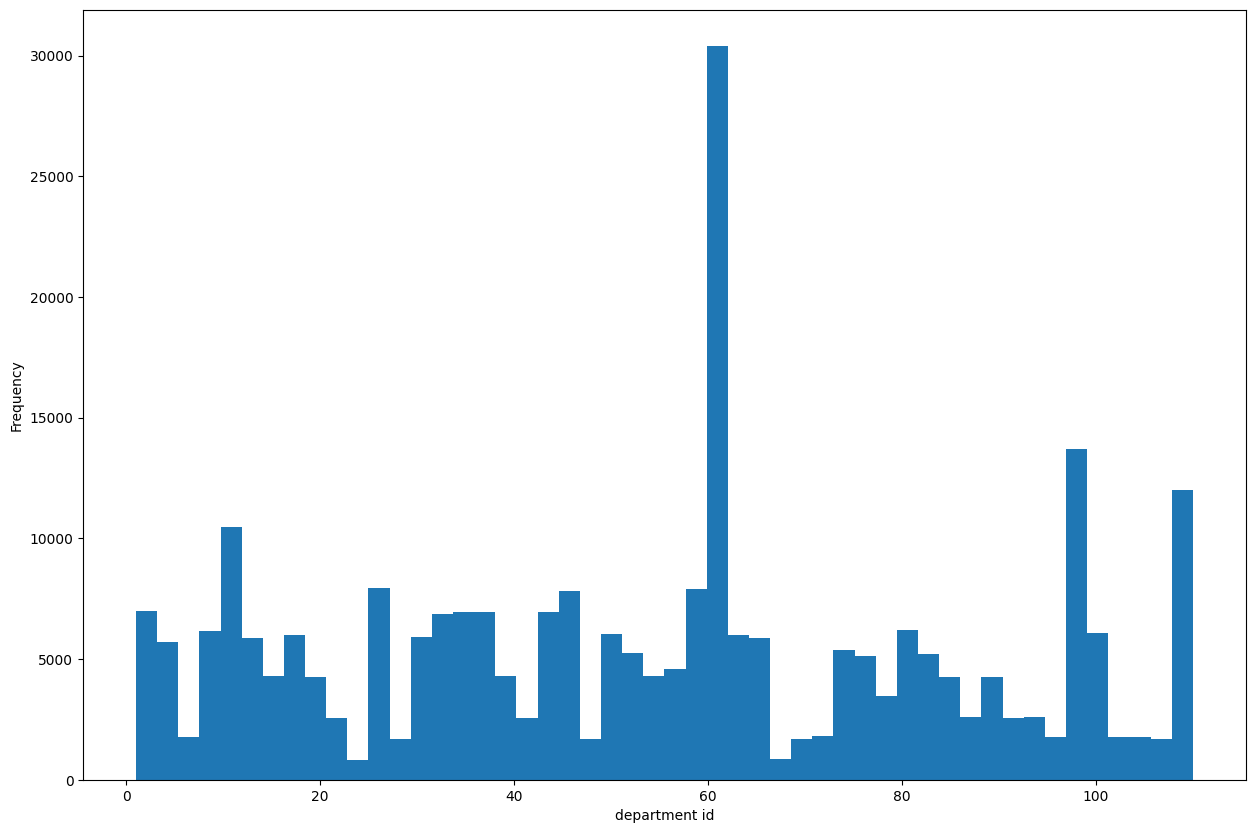

In [41]:
fig=plt.figure(figsize=(15,10))
df['product_class_id'].plot.hist(bins = 50)
plt.xlabel('department id')

**Frequency Plot Of Product Id**

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'product id')

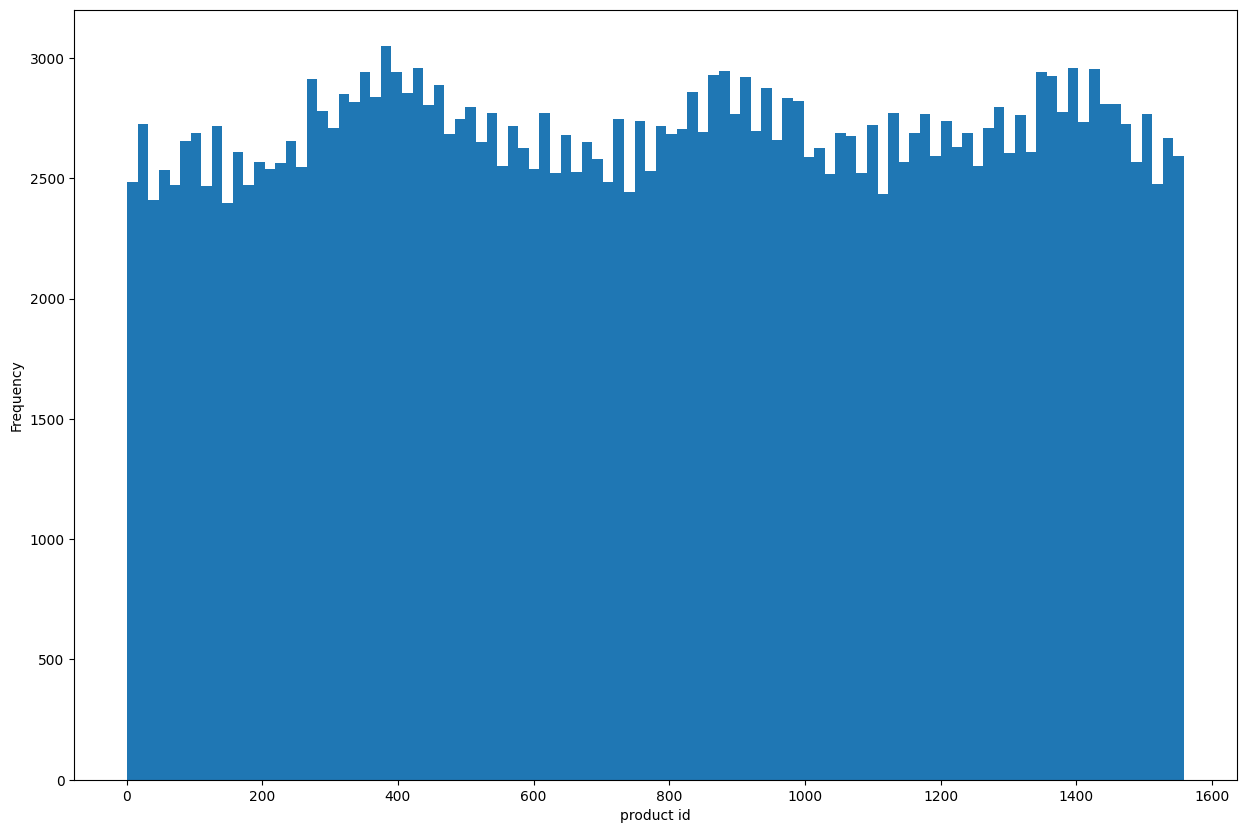

In [42]:
fig=plt.figure(figsize=(15,10))
df['product_id'].plot.hist(bins = 100)
plt.xlabel('product id')

**Frequency Plot Of Unit Sales**

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'Unit Sales')

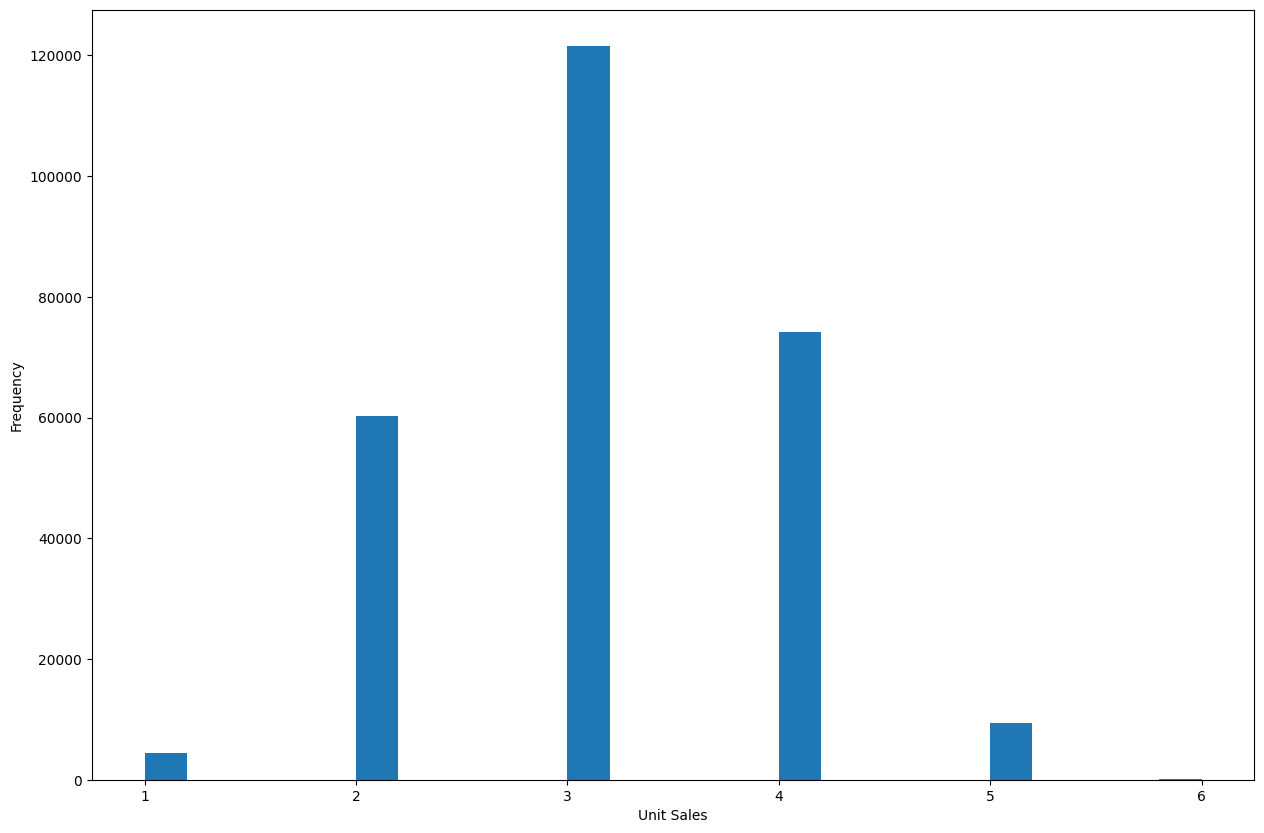

In [43]:
fig=plt.figure(figsize=(15,10))
df['unit_sales'].plot.hist(bins = 25)
plt.xlabel('Unit Sales')

**When do people order**

**Year**

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'year')

([<matplotlib.axis.XTick at 0x3357df590>,
 [Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999')])

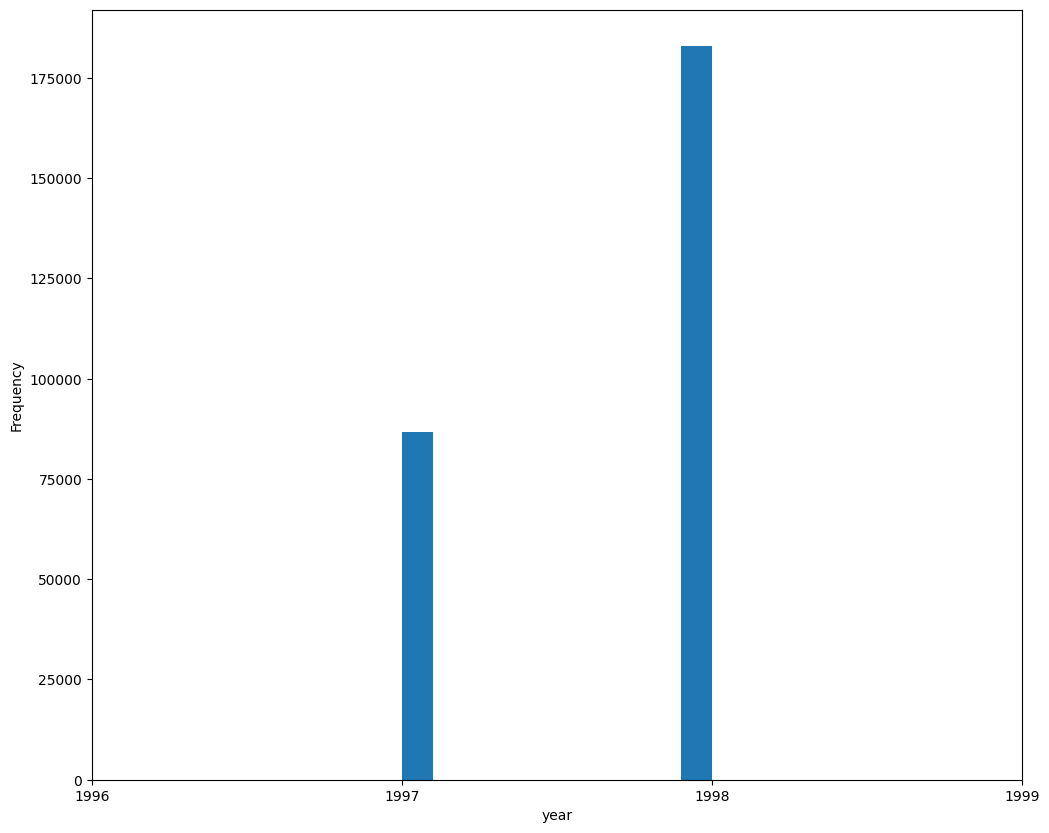

In [44]:
fig=plt.figure(figsize=(12,10))
df['the_year'].plot.hist(bins=10)
plt.xlabel('year')
plt.xticks([1996,1997,1998,1999])

**Month**

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'Month')

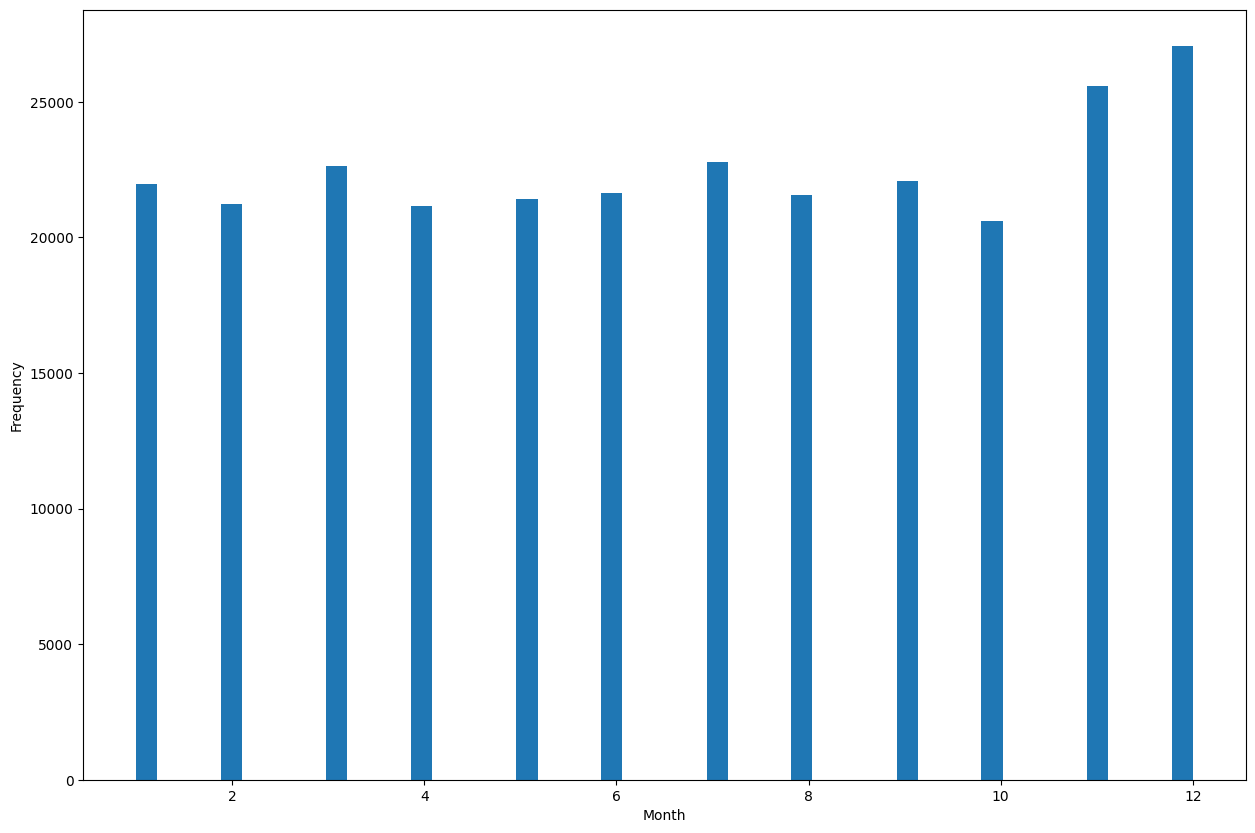

In [45]:
fig=plt.figure(figsize=(15,10))
df['the_month'].plot.hist(bins=50)
plt.xlabel('Month')

**Day Of Month**

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'Day of month')

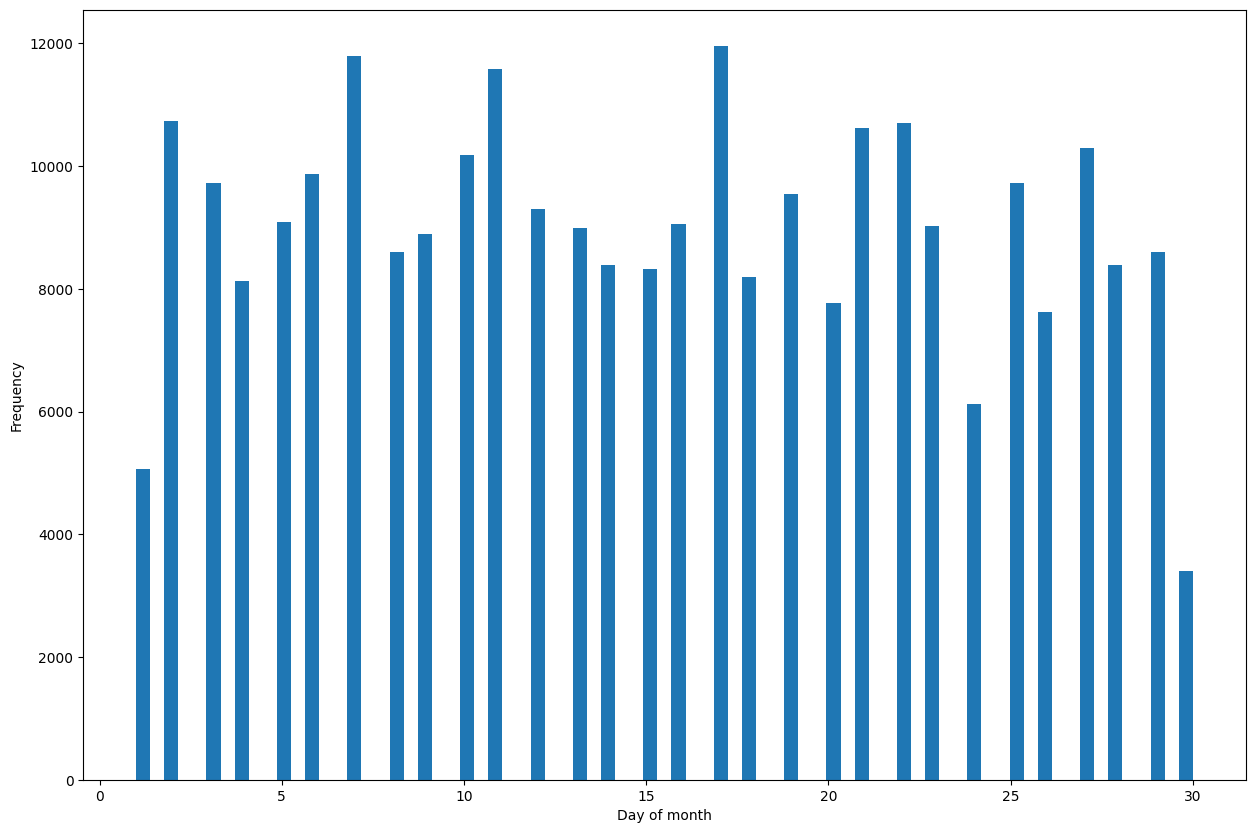

In [46]:
fig=plt.figure(figsize=(15,10))
df['day_of_month'].plot.hist(bins=75)
plt.xlabel('Day of month')

**Day Of Week**

<Axes: xlabel='the_day'>

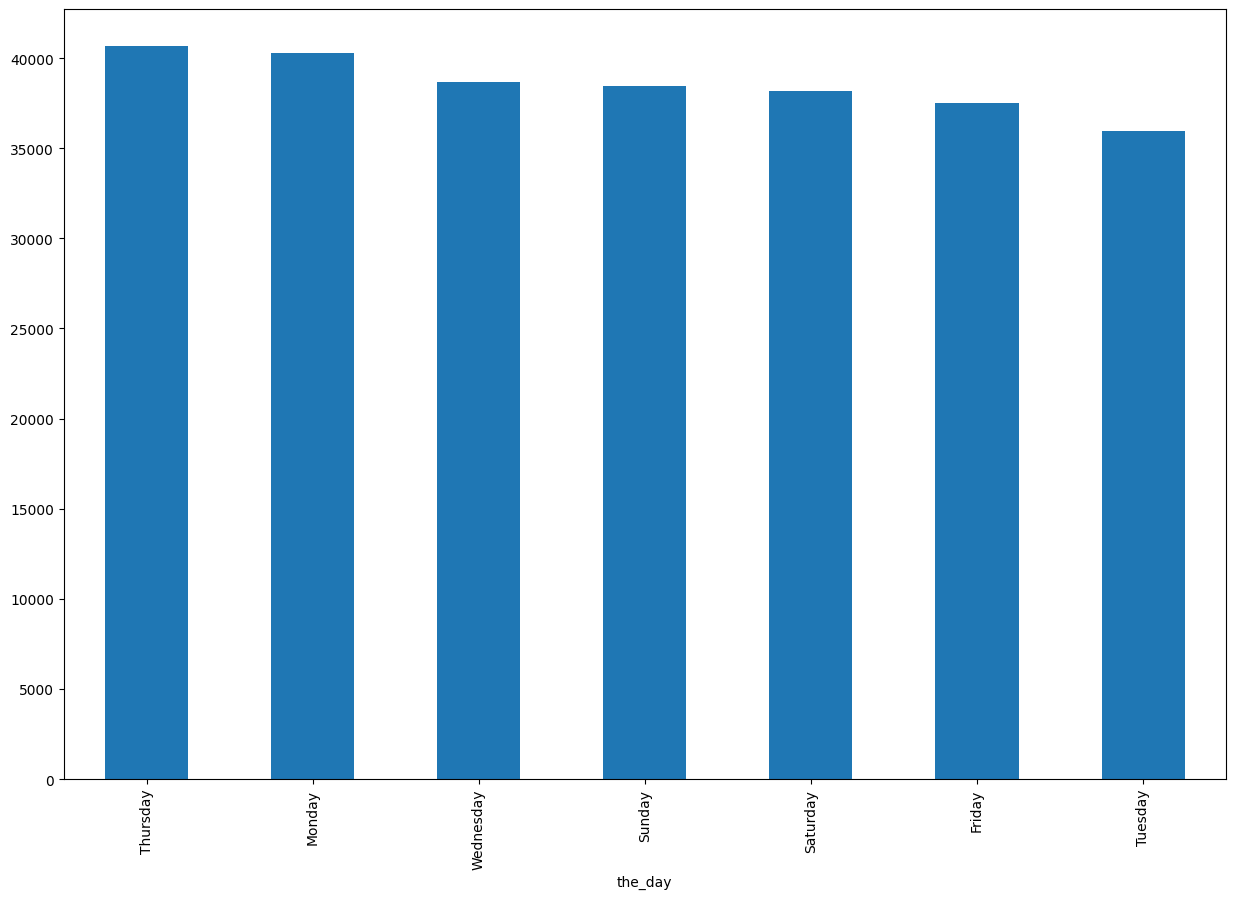

In [47]:
df_day_freq=df['the_day'].value_counts()
fig=plt.figure(figsize=(15, 10))
df_day_freq.plot.bar() 

### Top choices

**Top 10 First Choices in Products**

In [48]:
df['products'] = 'Products'
products = df.truncate(before = 605, after = 615)

products = nx.from_pandas_edgelist(products, source = 'products', target = 'product_name', edge_attr = True)

{'Products': Text(0.0026001475483271377, 0.0010941397998524465, 'Products'),
 'Denny Paper Plates': Text(0.965542542658382, -0.09930877063540189, 'Denny Paper Plates'),
 'Tell Tale Dried Mushrooms': Text(-0.0382129102499793, 1.0, 'Tell Tale Dried Mushrooms'),
 'Best Choice Chocolate Chip Cookies': Text(-0.5524075500293911, 0.7932143766637699, 'Best Choice Chocolate Chip Cookies'),
 'Best Choice Dried Apricots': Text(0.8882811257541723, 0.4521097411604939, 'Best Choice Dried Apricots'),
 'Pearl Light Wine': Text(-0.7200756740332904, -0.6744869882004688, 'Pearl Light Wine'),
 'BBB Best Grape Jelly': Text(0.4802838734789491, 0.8175312573892827, 'BBB Best Grape Jelly'),
 'Plato Sesame Oil': Text(-0.9565109544776186, -0.17575681038632784, 'Plato Sesame Oil'),
 'Carlson Strawberry Yogurt': Text(-0.238091246103241, -0.9476309977078667, 'Carlson Strawberry Yogurt'),
 'Fort West Sugar Cookies': Text(0.7673142876596786, -0.6120646374212725, 'Fort West Sugar Cookies'),
 'CDR Grape Jam': Text(-0.9

(np.float64(-1.1583265716768987),
 np.float64(1.1673581598576621),
 np.float64(-1.1521322524671929),
 np.float64(1.2045012547593261))

Text(0.5, 1.0, 'Top 10 First Choices in Products')

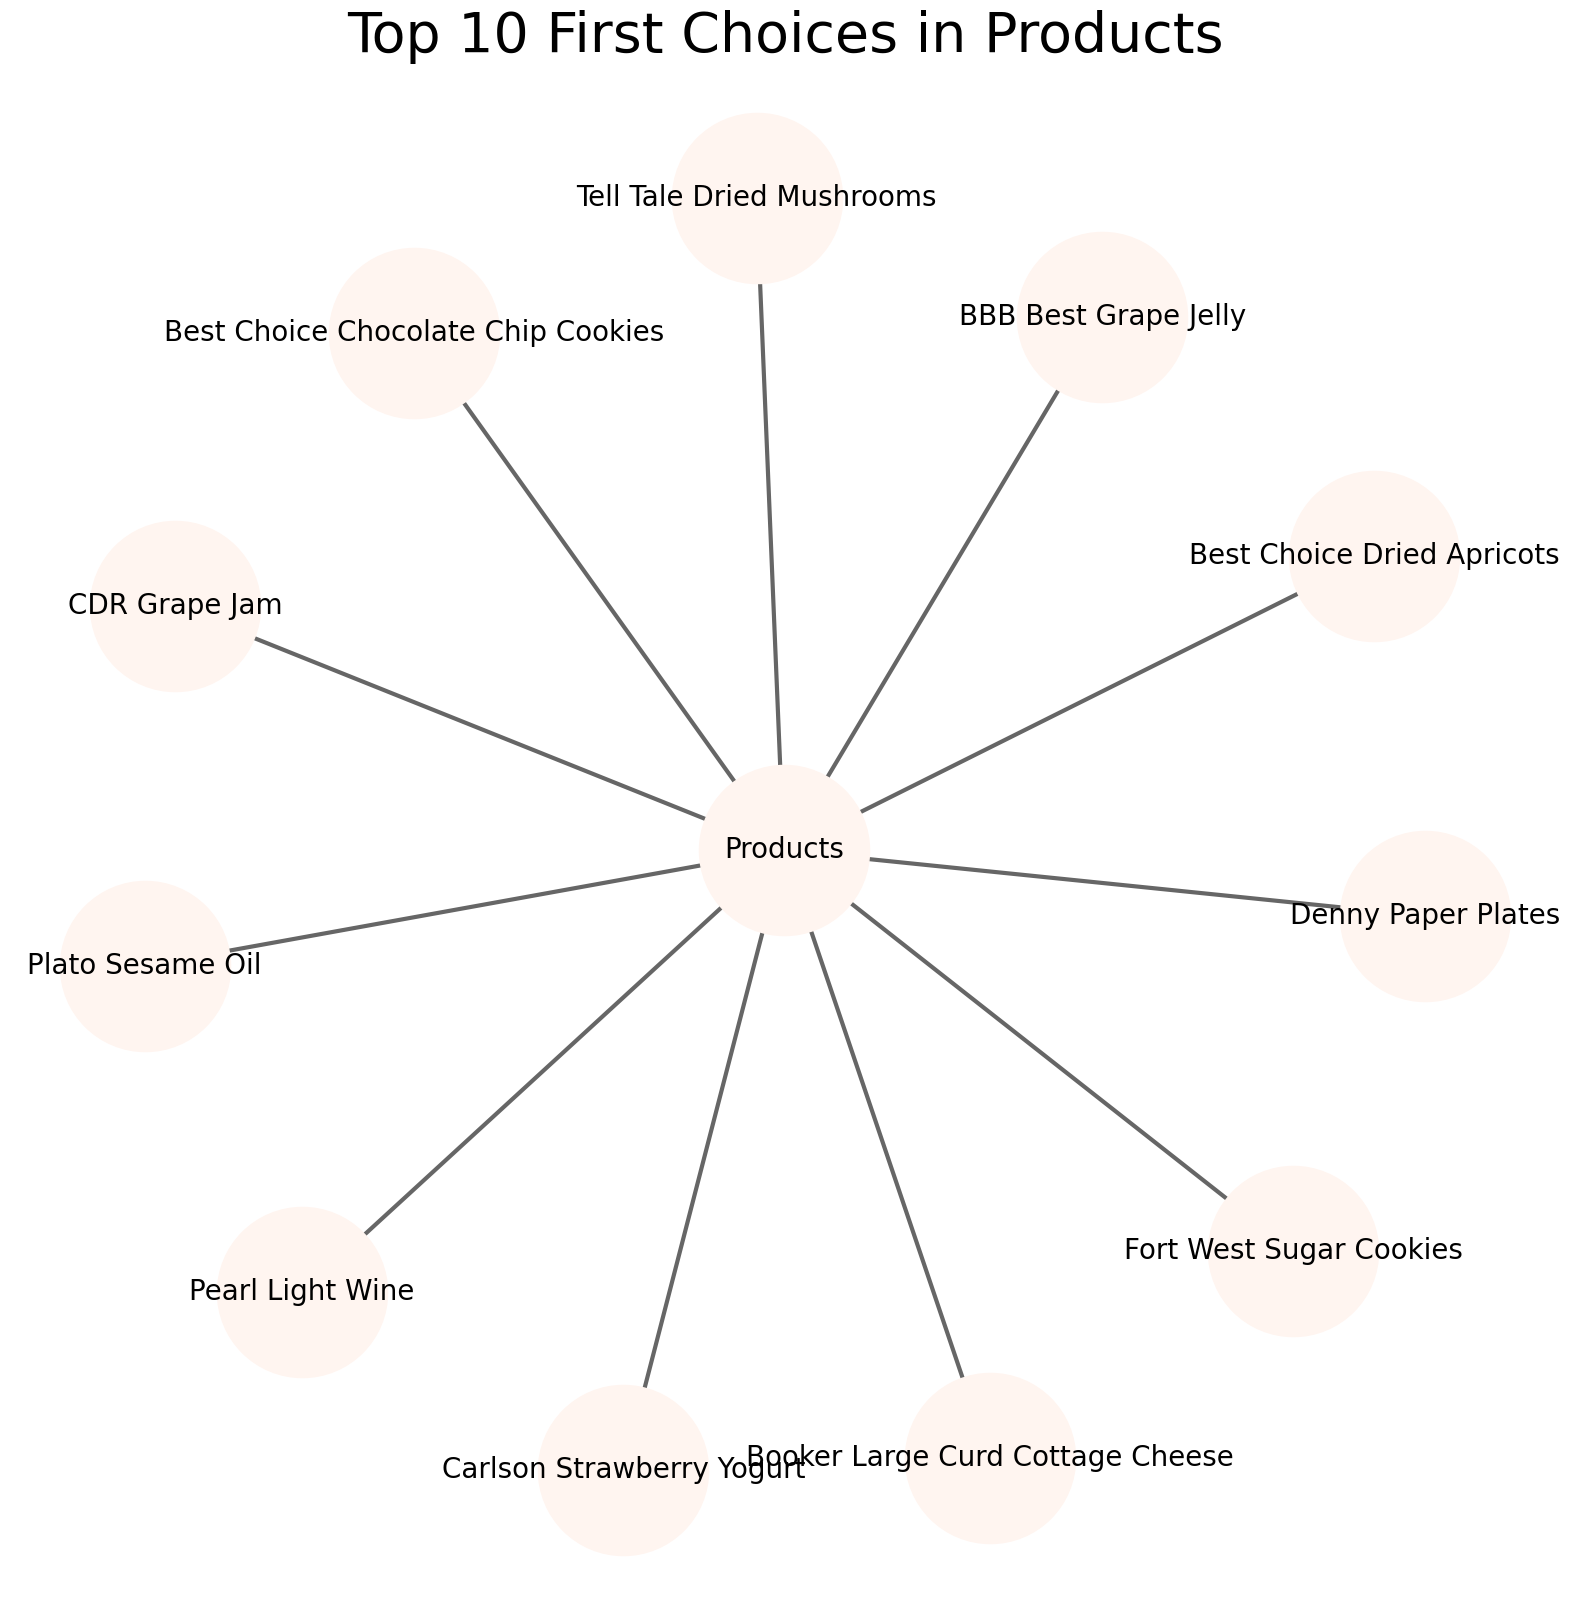

In [49]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(20,20)
pos=nx.spring_layout(products)
color=plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(products,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(products, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(products, pos, font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Products', fontsize = 40)
plt.show()

**Top 10 First Choices in Department**

In [50]:
df['departments'] = 'Departments'
departments = df.truncate(before = 150, after = 195)

departments = nx.from_pandas_edgelist(departments, source = 'departments', target = 'department', edge_attr = True)

{'Departments': Text(-0.003944500983743377, 0.0032592733543999426, 'Departments'),
 'Frozen Foods': Text(0.9913215123803046, -0.22787212814593652, 'Frozen Foods'),
 'Snacks': Text(0.6797927932579642, 0.6561276222579954, 'Snacks'),
 'Health and Hygiene': Text(-0.5708066085512692, 0.8525227412494002, 'Health and Hygiene'),
 'Breakfast Foods': Text(0.5317912912640074, -0.32247647422589815, 'Breakfast Foods'),
 'Snack Foods': Text(-0.6973479362479723, 0.4370913789719381, 'Snack Foods'),
 'Produce': Text(0.6418893129058959, -0.796661891919299, 'Produce'),
 'Dairy': Text(-0.2970380053964729, -0.9288401283861761, 'Dairy'),
 'Beverages': Text(0.15664225585432134, -0.9213090730447212, 'Beverages'),
 'Deli': Text(-1.0, 0.13102711617010165, 'Deli'),
 'Household': Text(-0.11335208317089365, 0.9229615627267221, 'Household'),
 'Canned Foods': Text(-0.6458841118513815, -0.6662361698904807, 'Canned Foods'),
 'Starchy Foods': Text(0.9156473477356546, 0.273763962402543, 'Starchy Foods'),
 'Baked Goods':

(np.float64(-1.2090887587999322),
 np.float64(1.2004102711802367),
 np.float64(-1.1232793059530306),
 np.float64(1.1174007402935766))

Text(0.5, 1.0, 'Top 10 First Choices in Departments')

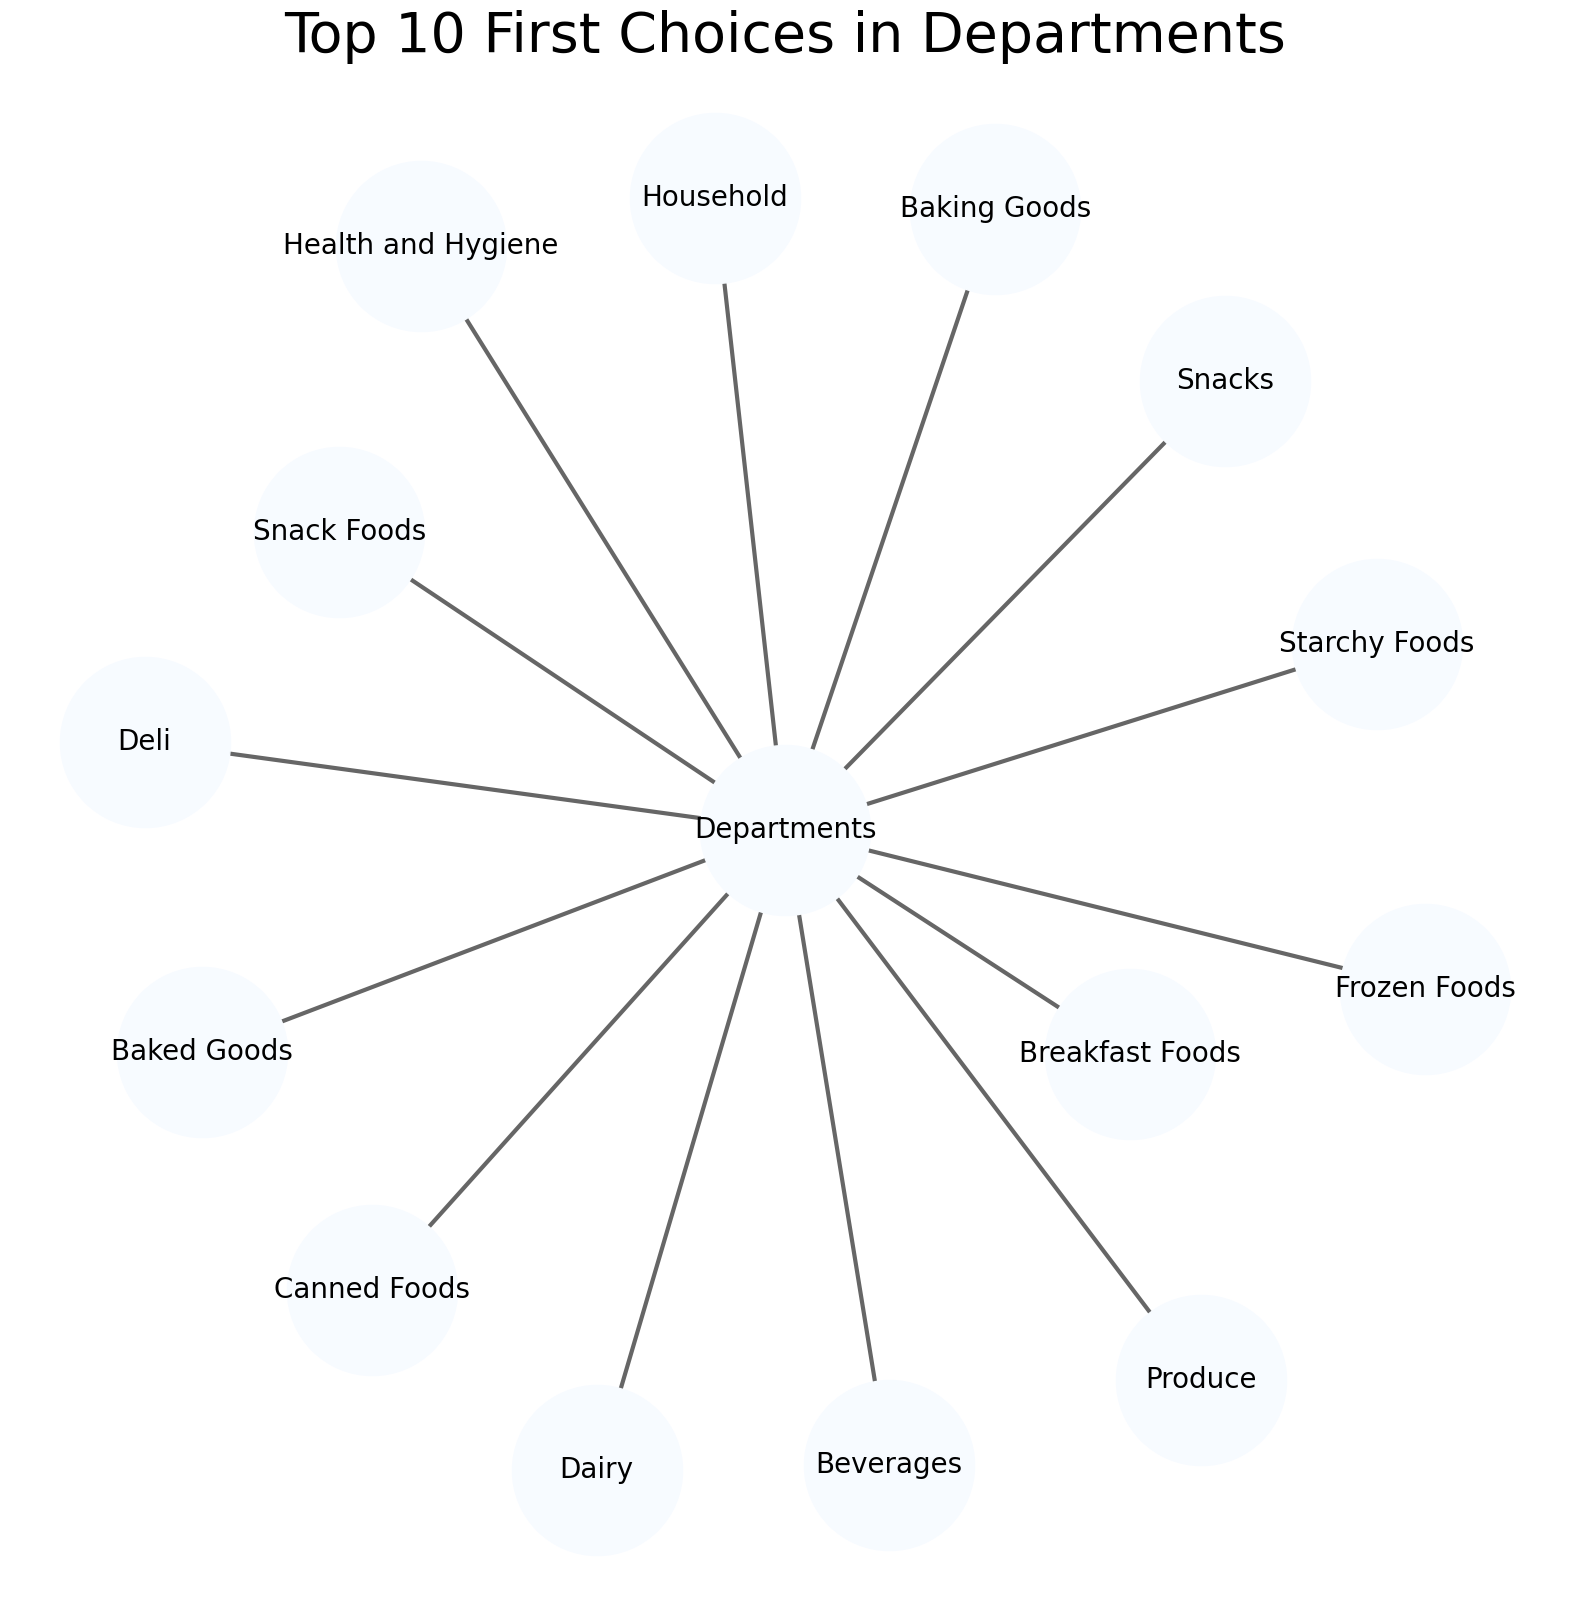

In [51]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(20,20)
pos=nx.spring_layout(departments)
color=plt.cm.Blues(np.linspace(0,15,1))
nx.draw_networkx_nodes(departments,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(departments, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(departments, pos, font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Departments', fontsize = 40)
plt.show()

**Highest Ordered**

**Most Ordered Products**

In [52]:
df['product_name'].value_counts()

product_name
Moms Roasted Chicken                           225
Tell Tale Fresh Lima Beans                     219
Steady Whitening Toothpast                     218
Hilltop Silky Smooth Hair Conditioner          216
Nationeel Dried Apples                         214
Steady Childrens Cold Remedy                   214
Hilltop Mint Mouthwash                         213
Ebony Mixed Nuts                               213
Sunset Economy Toilet Brush                    213
Special Wheat Puffs                            212
Ebony Fresh Lima Beans                         211
Red Wing Glass Cleaner                         208
Hermanos Potatos                               208
BBB Best French Roast Coffee                   208
BBB Best Apple Butter                          207
Hermanos Green Pepper                          207
Better Chicken Noodle Soup                     207
Great English Muffins                          207
Big Time Orange Popsicles                      207
Great Pumpernickel

**Most Ordered Products in Percentage**

In [53]:
df['product_name'].value_counts()/len(df)*100

product_name
Moms Roasted Chicken                           0.083420
Tell Tale Fresh Lima Beans                     0.081195
Steady Whitening Toothpast                     0.080825
Hilltop Silky Smooth Hair Conditioner          0.080083
Nationeel Dried Apples                         0.079342
Steady Childrens Cold Remedy                   0.079342
Hilltop Mint Mouthwash                         0.078971
Ebony Mixed Nuts                               0.078971
Sunset Economy Toilet Brush                    0.078971
Special Wheat Puffs                            0.078600
Ebony Fresh Lima Beans                         0.078229
Red Wing Glass Cleaner                         0.077117
Hermanos Potatos                               0.077117
BBB Best French Roast Coffee                   0.077117
BBB Best Apple Butter                          0.076746
Hermanos Green Pepper                          0.076746
Better Chicken Noodle Soup                     0.076746
Great English Muffins              

**Most Visited Departments**

In [54]:
df['department'].value_counts()

department
Produce                38041
Snack Foods            30983
Household              27590
Frozen Foods           27042
Baking Goods           20573
Canned Foods           19090
Dairy                  17195
Health and Hygiene     16643
Beverages              13624
Deli                   12130
Baked Goods             7951
Snacks                  6970
Alcoholic Beverages     6931
Starchy Foods           5198
Periodicals             4318
Eggs                    4099
Breakfast Foods         3462
Canned Products         1779
Meat                    1777
Checkout                1776
Seafood                 1688
Carousel                 860
Name: count, dtype: int64

**Most Visited Departments in Percentage**

In [55]:
df['department'].value_counts()/len(df)*100

department
Produce                14.103886
Snack Foods            11.487098
Household              10.229127
Frozen Foods           10.025953
Baking Goods            7.627540
Canned Foods            7.077710
Dairy                   6.375130
Health and Hygiene      6.170473
Beverages               5.051164
Deli                    4.497256
Baked Goods             2.947872
Snacks                  2.584161
Alcoholic Beverages     2.569702
Starchy Foods           1.927184
Periodicals             1.600919
Eggs                    1.519724
Breakfast Foods         1.283553
Canned Products         0.659573
Meat                    0.658831
Checkout                0.658461
Seafood                 0.625834
Carousel                0.318849
Name: count, dtype: float64

**Most Visited Aisle**

In [56]:
df['subcategory'].value_counts()

subcategory
Fresh Vegetables      20859
Fresh Fruit           11972
Soup                   7919
Cheese                 7815
Dried Fruit            7758
Cookies                6930
Wine                   5189
Paper Wipes            5128
Canned Vegetables      5092
Frozen Vegetables      4435
Nuts                   4345
Chocolate Candy        4341
Milk                   4250
Preserves              4237
Chips                  4176
Eggs                   4099
Lightbulbs             3609
Sliced Bread           3586
Muffins                3517
Dips                   3506
Waffles                3501
Pizza                  3481
Cereal                 3462
Cooking Oil            3455
Personal Hygiene       3454
Batteries              3435
Deli Meats             3435
Juice                  3429
Popsicles              3393
Coffee                 3387
Soda                   3367
Pasta                  3148
Ice Cream              2736
Peanut Butter          2660
TV Dinner              2643
Deli Sal

**Most Visited Aisle in Percentage**

In [57]:
df['subcategory'].value_counts()/len(df)*100

subcategory
Fresh Vegetables      7.733576
Fresh Fruit           4.438677
Soup                  2.936008
Cheese                2.897449
Dried Fruit           2.876316
Cookies               2.569331
Wine                  1.923847
Paper Wipes           1.901231
Canned Vegetables     1.887884
Frozen Vegetables     1.644298
Nuts                  1.610930
Chocolate Candy       1.609447
Milk                  1.575708
Preserves             1.570888
Chips                 1.548272
Eggs                  1.519724
Lightbulbs            1.338054
Sliced Bread          1.329527
Muffins               1.303945
Dips                  1.299867
Waffles               1.298013
Pizza                 1.290598
Cereal                1.283553
Cooking Oil           1.280958
Personal Hygiene      1.280587
Batteries             1.273543
Deli Meats            1.273543
Juice                 1.271318
Popsicles             1.257971
Coffee                1.255747
Soda                  1.248332
Pasta                 1.167

**BarPlot**

**BarPlot of Most Visied Aisle**

<Axes: xlabel='subcategory'>

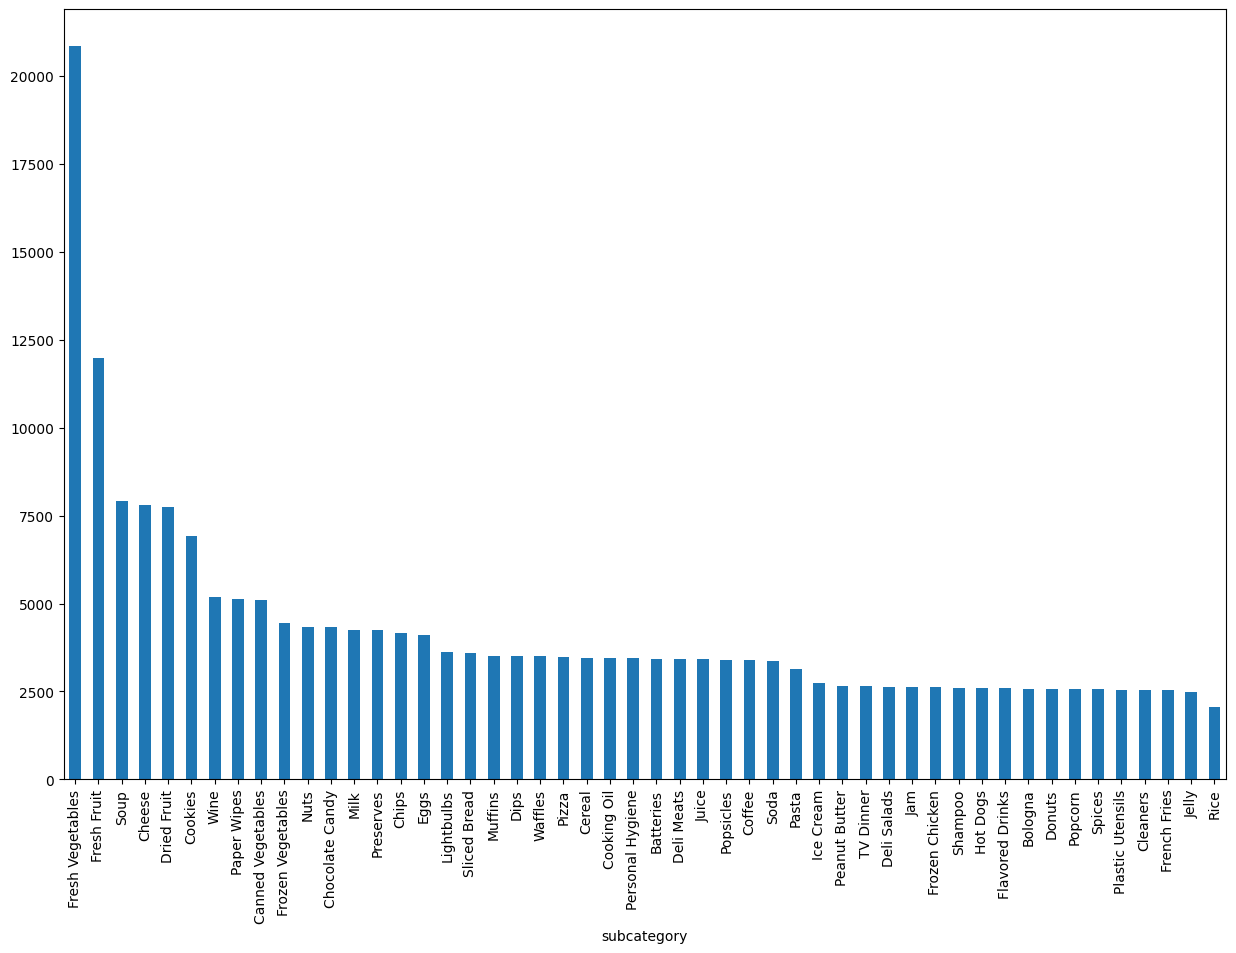

In [58]:
df_subcategory_freq=df['subcategory'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15,10))
df_subcategory_freq.plot.bar()

**BarPlot of Most Visited Department**

<Axes: xlabel='department'>

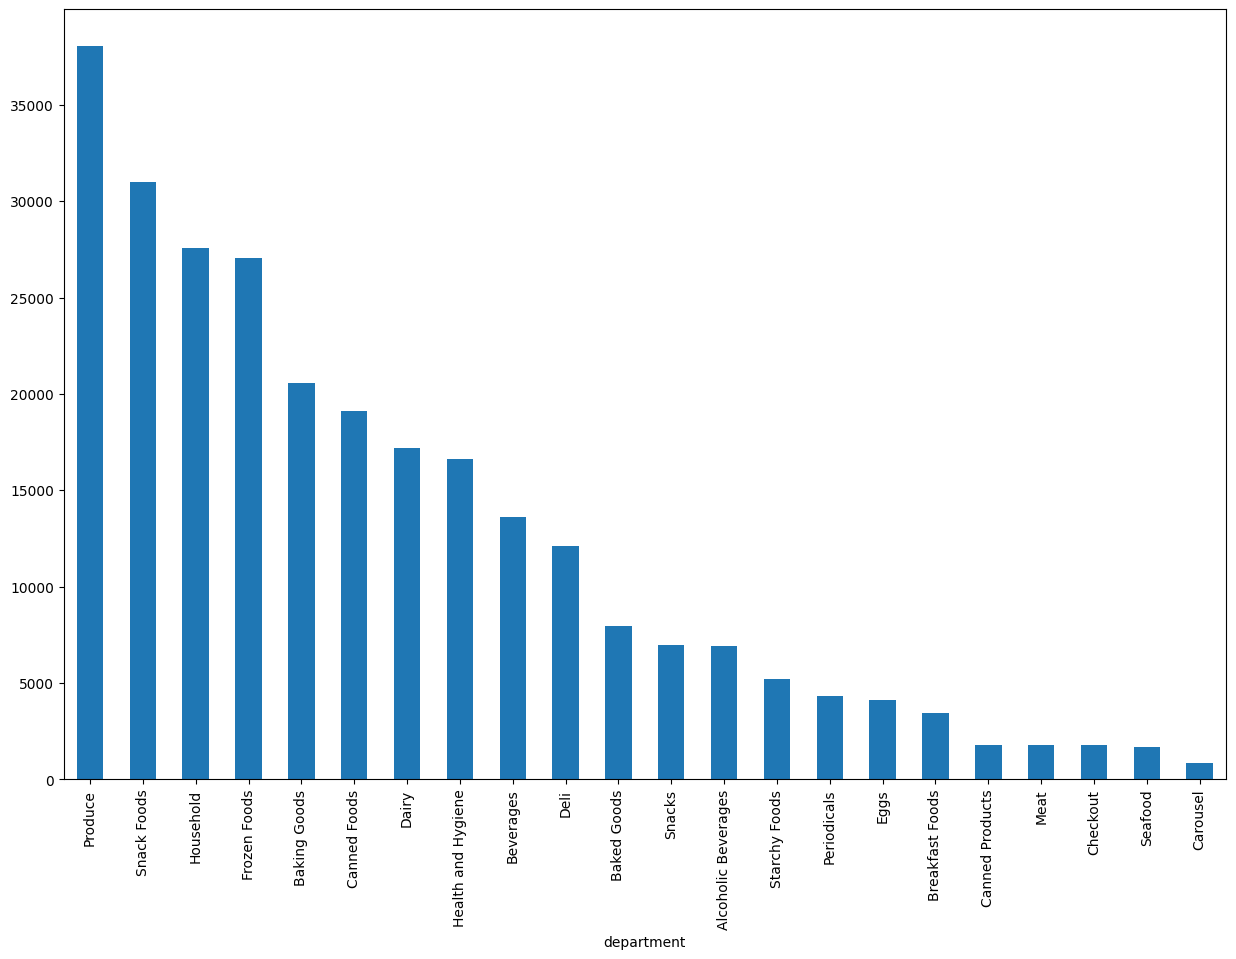

In [59]:
fig=plt.figure(figsize=(15,10))
df['department'].value_counts().plot(kind='bar')

**BarPlot of Most Bought Product**

<Axes: xlabel='product_name'>

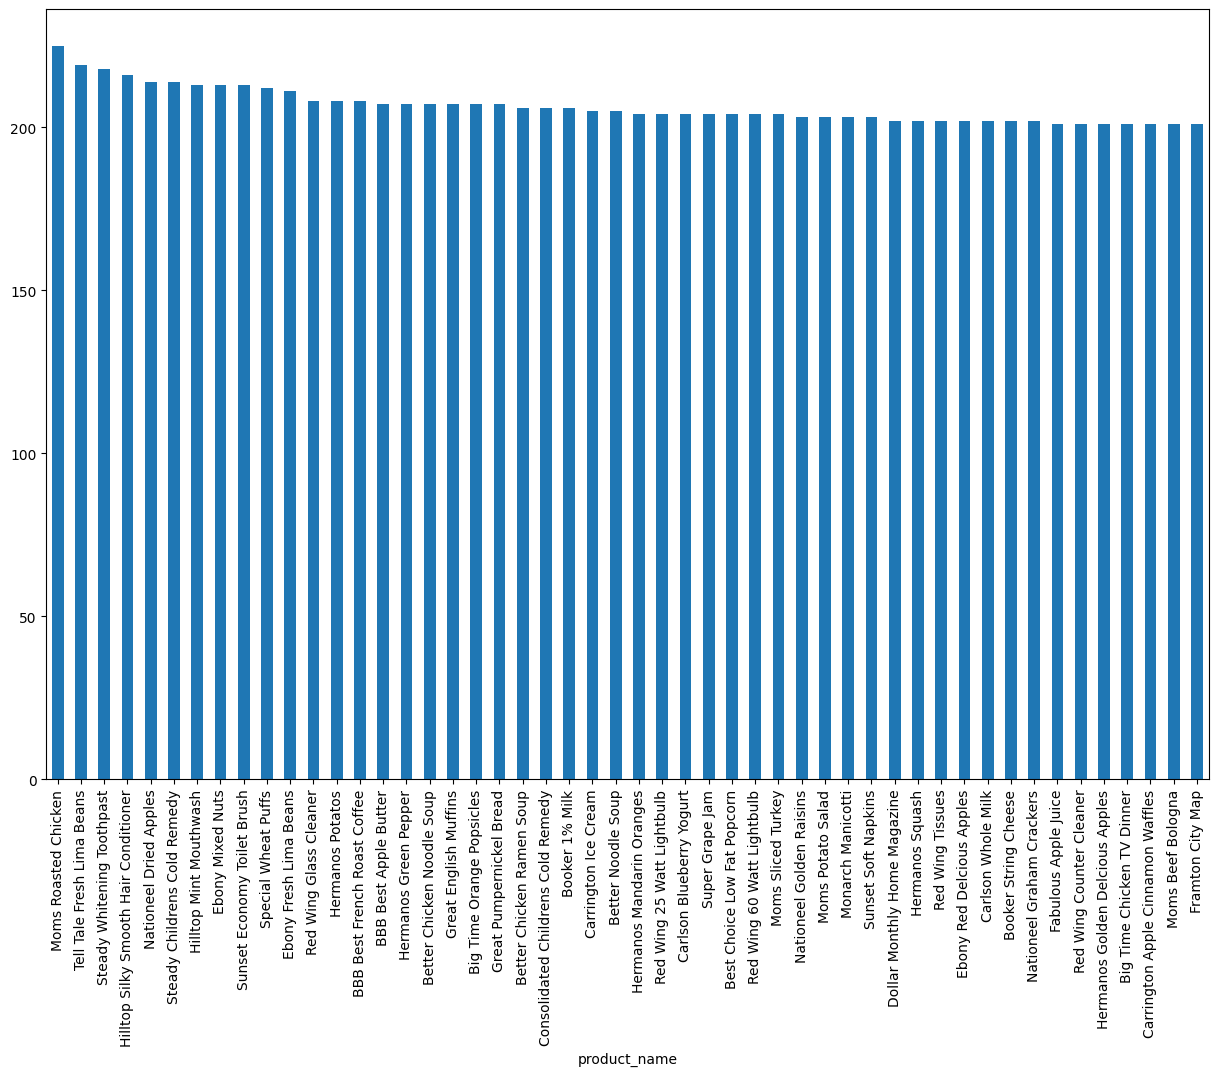

In [60]:
df_freq_products=df['product_name'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15, 10))
df_freq_products.plot.bar() 

**Array of Most Bought Product**

In [61]:
y=df_freq_products.head(50).to_frame()
y.index

Index(['Moms Roasted Chicken', 'Tell Tale Fresh Lima Beans',
       'Steady Whitening Toothpast', 'Hilltop Silky Smooth Hair Conditioner',
       'Nationeel Dried Apples', 'Steady Childrens Cold Remedy',
       'Hilltop Mint Mouthwash', 'Ebony Mixed Nuts',
       'Sunset Economy Toilet Brush', 'Special Wheat Puffs',
       'Ebony Fresh Lima Beans', 'Red Wing Glass Cleaner', 'Hermanos Potatos',
       'BBB Best French Roast Coffee', 'BBB Best Apple Butter',
       'Hermanos Green Pepper', 'Better Chicken Noodle Soup',
       'Great English Muffins', 'Big Time Orange Popsicles',
       'Great Pumpernickel Bread', 'Better Chicken Ramen Soup',
       'Consolidated Childrens Cold Remedy', 'Booker 1% Milk',
       'Carrington Ice Cream', 'Better Noodle Soup',
       'Hermanos Mandarin Oranges', 'Red Wing 25 Watt Lightbulb',
       'Carlson Blueberry Yogurt', 'Super Grape Jam',
       'Best Choice Low Fat Popcorn', 'Red Wing 60 Watt Lightbulb',
       'Moms Sliced Turkey', 'Nationeel Golden R

**TreeMap for Most Bought Products**

<Axes: >

Text(0.5, 1.0, 'tree map for frequent products')

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

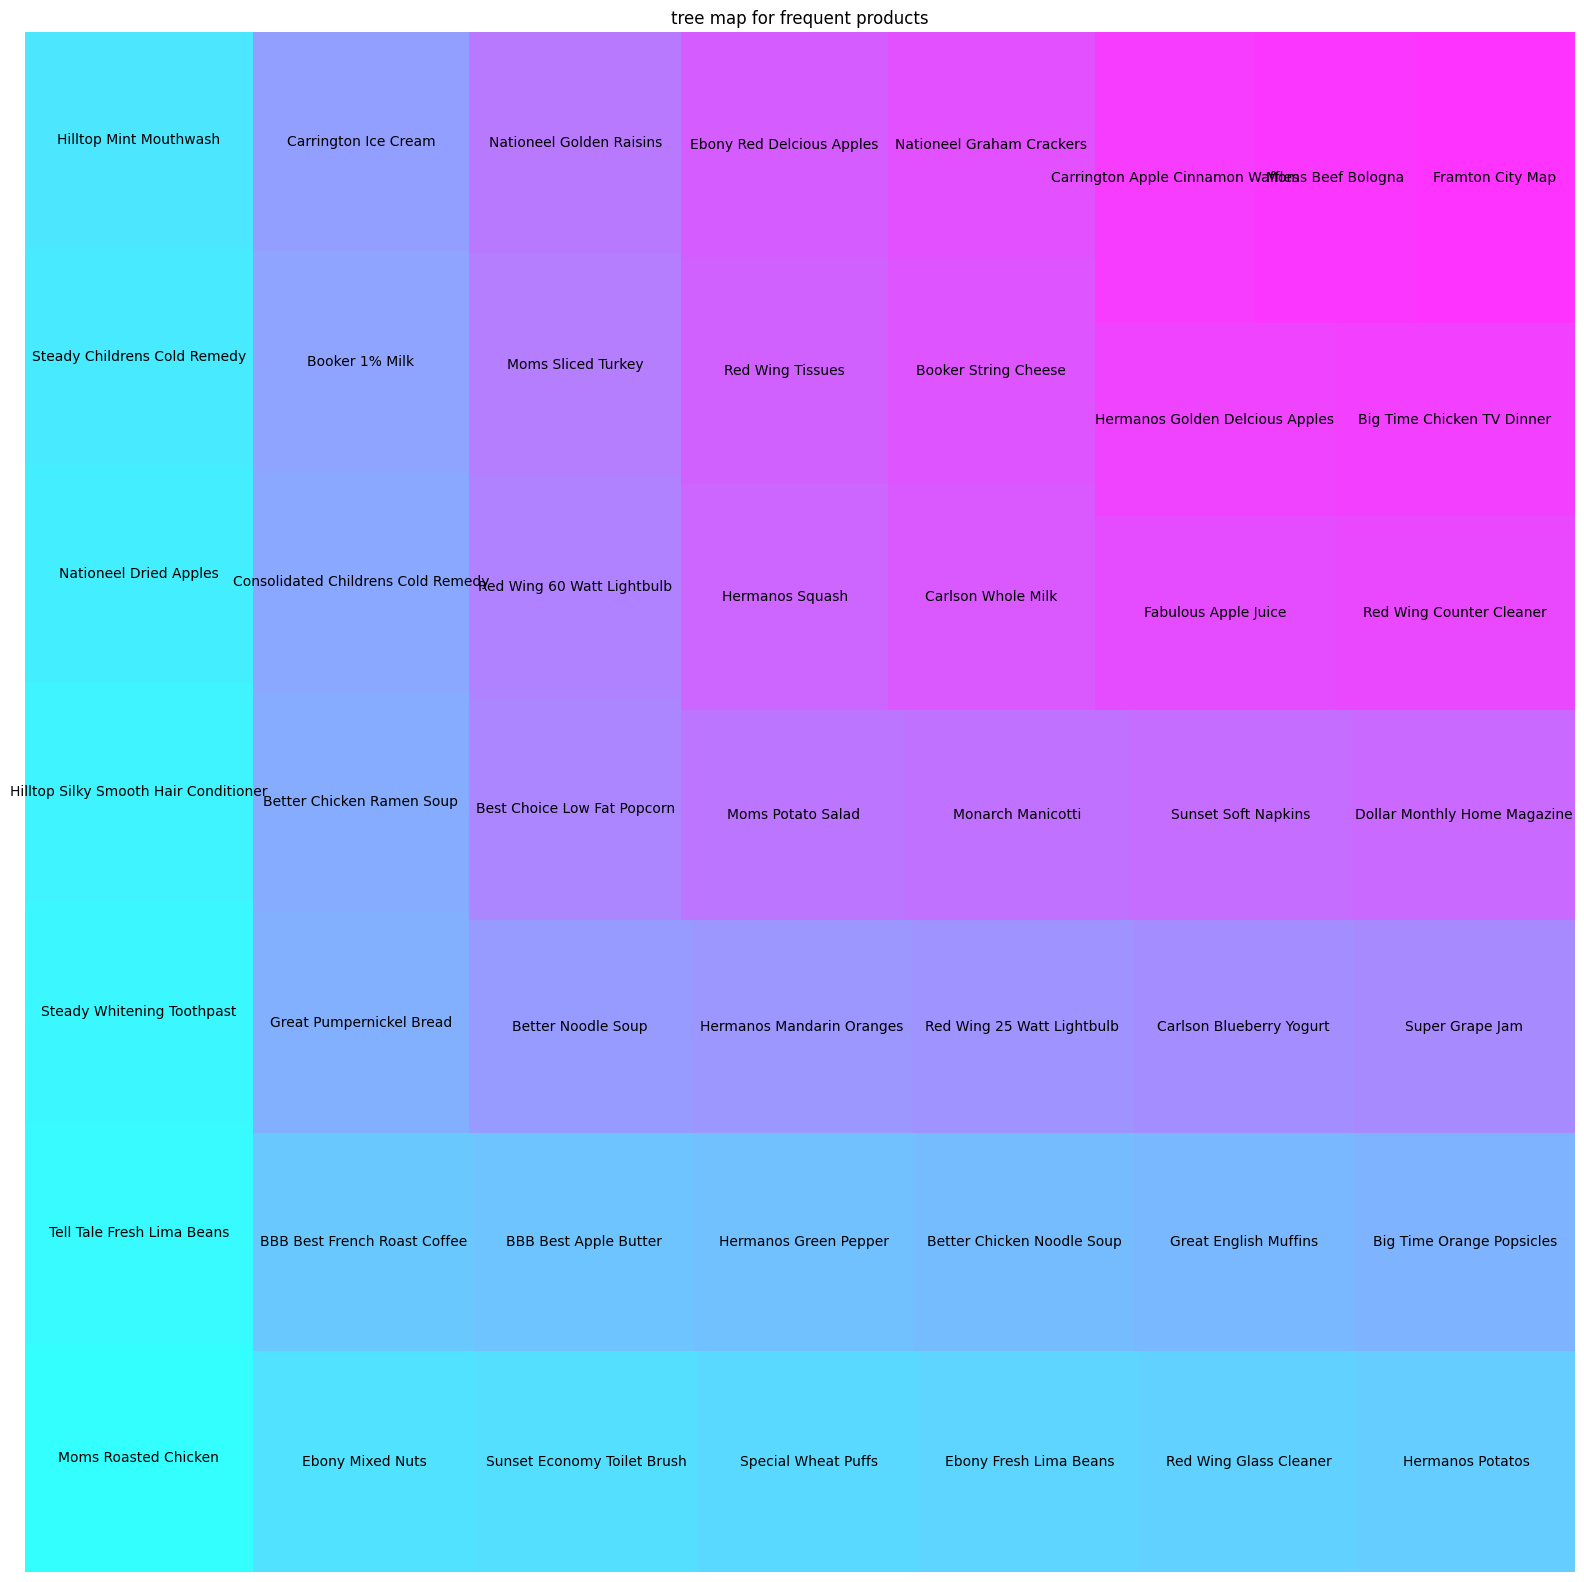

In [62]:
plt.rcParams['figure.figsize']=(20,20)
color=plt.cm.cool(np.linspace(0,1,50))
squarify.plot(sizes=y.values,label=y.index,alpha=0.8,color=color)
plt.title('tree map for frequent products')
plt.axis('off')

# Data Manipulation

In [63]:
df.shape

(269720, 77)

**Drop Duplicates**

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
df.shape

(269720, 77)

**Missing Values**

In [66]:
df.isnull().sum()

Unnamed: 0              0
product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department  

**Datatypes**

In [67]:
df.dtypes

Unnamed: 0                int64
product_id                int64
time_id                   int64
customer_id               int64
store_id                  int64
store_sales             float64
store_cost              float64
unit_sales                int64
city                     object
state_province           object
country                  object
customer_region_id        int64
yearly_income            object
gender                   object
total_children            int64
num_children_at_home      int64
education                object
date_accnt_opened        object
member_card              object
occupation               object
houseowner               object
num_cars_owned            int64
product_class_id          int64
brand_name               object
product_name             object
SKU                       int64
SRP                     float64
gross_weight            float64
net_weight              float64
recyclable_package        int64
low_fat                   int64
units_pe

# Bivariate Analysis

**Bar Plot**

**Bar Plot between customers and their products per order**

In [68]:
data_user_orders_num=df.groupby('customer_id')['unit_sales'].count()
data_user_orders_num

customer_id
3         30
5          1
6         16
8         42
9         13
10        31
11         7
12         2
14        14
17         8
18         5
19         5
20        36
21        23
23         9
24        29
25         6
26        15
27         3
28        22
30        23
31         6
32         9
34        18
36        30
38        15
39        54
40         7
41        19
42        33
43        24
44        37
45        31
47         4
48        52
49        17
50        16
52        31
53         2
55        29
56         5
57        29
59        35
60        18
62         8
64        21
66         6
67         3
70         8
71        29
74        23
75        17
76        89
77        28
79        39
80        22
81        21
83        11
84        12
87        23
88        20
89        15
90         4
91        21
93        41
96        20
97        19
98         8
99       102
101       18
102       12
104       91
105       17
106       16
108        1
109        8


In [69]:
source_data = {}
for i in range(10):
    source_data[str(10*i)+'~'+str(10*(i+1))]=len([x for x in list(data_user_orders_num) if x>=i*10 and x<(i+1)*10])
    
source_data

{'0~10': 2145,
 '10~20': 2509,
 '20~30': 1510,
 '30~40': 760,
 '40~50': 454,
 '50~60': 276,
 '60~70': 244,
 '70~80': 175,
 '80~90': 160,
 '90~100': 110}

<BarContainer object of 4 artists>

Text(0.5, 0, 'Unit sales')

Text(0, 0.5, 'No. of customers')

Text(0.5, 1.0, 'Orders Bar Chart')

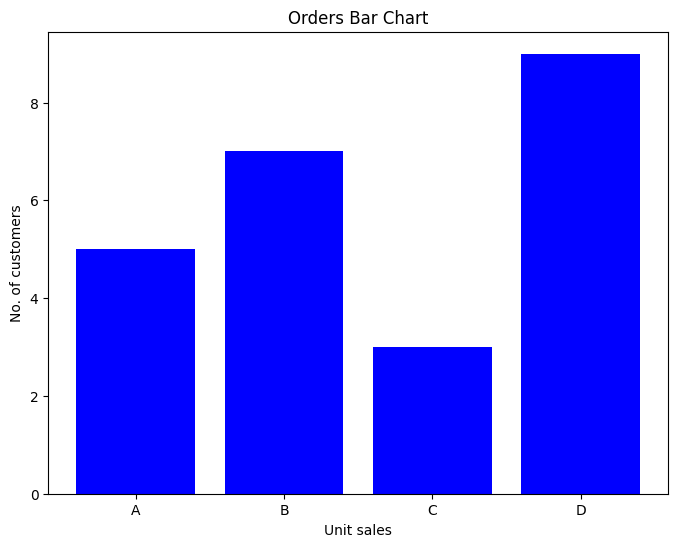

In [72]:
import matplotlib.pyplot as plt

font_size = 10
fig_size = (8, 6)
plt.rcParams['font.size'] = font_size
plt.rcParams['figure.figsize'] = fig_size
bar_width = 0.3

source_data = {'A': 5, 'B': 7, 'C': 3, 'D': 9}  # Example data

x_axis = tuple(source_data.keys())
y_axis = tuple(source_data.values())

plt.bar(x_axis, y_axis, color='blue')  # Use a valid color
plt.xlabel('Unit sales')  
plt.ylabel("No. of customers") 
plt.title("Orders Bar Chart") 
plt.show()


**Transaction ID** - create transaction id which denotes a basket

In [73]:
df['transaction_id'] = df['customer_id'].astype(str) + df['time_id'].astype(str)

In [74]:
df.head()

,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,products,departments,transaction_id
0,0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Products,Departments,6280371
1,1,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Products,Departments,6280371
2,2,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Products,Departments,4018371
3,3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Products,Departments,4018371
4,4,1383,371,4018,2,5.18,2.1756,2,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,56,Sunset,Sunset Plastic Spoons,81217407584,2.59,19.00,17.00,0,0,7,10,7.48,16.4,18.50,Plastic Utensils,Plastic Products,Household,Non-Consumable,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Products,Departments,4018371


**Filtering out Columns**

In [75]:
cols = [77,3,1,24]
order_products=df[df.columns[cols]]

In [76]:
order_products.head()

,transaction_id,customer_id,product_id,product_name
0,6280371,6280,337,Better Turkey Noodle Soup
1,6280371,6280,1512,Jardon Spaghetti
2,4018371,4018,963,Just Right Chicken Noodle Soup
3,4018371,4018,181,High Top Lettuce
4,4018371,4018,1383,Sunset Plastic Spoons


**Average products bought by customers per order**

In [77]:
data_user_products_num1=order_products.groupby('transaction_id')['product_id'].count()
data_user_products_num1=pd.DataFrame(data_user_products_num1)
data_user_products_num1['transaction_id']=list(data_user_products_num1.index)
data_user_products_num1.columns=['product_num','orderid']
data_user_products_num2=pd.merge(data_user_products_num1,df[['transaction_id','customer_id']],on='transaction_id',how='left')

data_user_products_num3=data_user_products_num2.groupby('customer_id')['product_num'].agg(['sum','count'])
data_user_products_num3['avg']=data_user_products_num3['sum']/data_user_products_num3['count']

In [78]:
data_user_products_num3.head()

,sum,count,avg
customer_id,,,
3,186,30,6.200000
5,1,1,1.000000
6,72,16,4.500000
8,208,42,4.952381
9,85,13,6.538462


# Featured Products Department Wise

In [79]:
cols = [1,36,38,24]
departments=df[df.columns[cols]]
departments.head()

,product_id,subcategory,department,product_name
0,337,Soup,Canned Foods,Better Turkey Noodle Soup
1,1512,Pasta,Starchy Foods,Jardon Spaghetti
2,963,Soup,Canned Foods,Just Right Chicken Noodle Soup
3,181,Fresh Vegetables,Produce,High Top Lettuce
4,1383,Plastic Utensils,Household,Sunset Plastic Spoons


**List Of Departments**

In [80]:
temp=['department']
for i in temp:
    print('@@@@@@Value Count in',i,'@@@@@@@@@')
    print(df[i].value_counts())

@@@@@@Value Count in department @@@@@@@@@
department
Produce                38041
Snack Foods            30983
Household              27590
Frozen Foods           27042
Baking Goods           20573
Canned Foods           19090
Dairy                  17195
Health and Hygiene     16643
Beverages              13624
Deli                   12130
Baked Goods             7951
Snacks                  6970
Alcoholic Beverages     6931
Starchy Foods           5198
Periodicals             4318
Eggs                    4099
Breakfast Foods         3462
Canned Products         1779
Meat                    1777
Checkout                1776
Seafood                 1688
Carousel                 860
Name: count, dtype: int64


**Produce Department**

In [81]:
produce=departments.loc[df['department'] == 'Produce']
produce.head()

,product_id,subcategory,department,product_name
3,181,Fresh Vegetables,Produce,High Top Lettuce
10,483,Fresh Vegetables,Produce,Tell Tale Corn on the Cob
19,194,Tofu,Produce,High Top Firm Tofu
25,182,Fresh Vegetables,Produce,High Top Elephant Garlic
39,1437,Fresh Vegetables,Produce,Hermanos Mushrooms


**Featured Products in Produce Department**

In [82]:
top_produce=produce['product_name'].value_counts().iloc[:10]
top_produce.head()

product_name
Tell Tale Fresh Lima Beans    219
Ebony Mixed Nuts              213
Ebony Fresh Lima Beans        211
Hermanos Potatos              208
Hermanos Green Pepper         207
Name: count, dtype: int64

**Featured Products in Snack Foods Department**

In [83]:
snacks=df.loc[df['department']=='Snack Foods']
top_snacks=snacks['product_name'].value_counts().iloc[:10]
top_snacks.head()

product_name
Nationeel Dried Apples         214
Best Choice Low Fat Popcorn    204
Nationeel Golden Raisins       203
Nationeel Graham Crackers      202
Fast Beef Jerky                198
Name: count, dtype: int64

**Featured Products in HouseHold Department**

In [84]:
household=df.loc[df['department']=='Household']
top_household=household['product_name'].value_counts().iloc[:10]
print(top_household)

product_name
Sunset Economy Toilet Brush    213
Red Wing Glass Cleaner         208
Red Wing 25 Watt Lightbulb     204
Red Wing 60 Watt Lightbulb     204
Sunset Soft Napkins            203
Red Wing Tissues               202
Sunset Paper Cups              201
Red Wing Counter Cleaner       201
Denny 60 Watt Lightbulb        200
Sunset Paper Plates            199
Name: count, dtype: int64


**Featured Products in Frozen Foods Department**

In [85]:
frozen=df.loc[df['department']=='Frozen Foods']
top_frozen=frozen['product_name'].value_counts().iloc[:10]
print(top_frozen)

product_name
Big Time Orange Popsicles            207
Carrington Ice Cream                 205
Carrington Apple Cinnamon Waffles    201
Big Time Chicken TV Dinner           201
Carrington Beef TV Dinner            200
Big Time Frozen Broccoli             200
Big Time Pancake Mix                 200
Big Time Frozen Cheese Pizza         199
Carrington Ice Cream Sandwich        198
Big Time Ice Cream                   197
Name: count, dtype: int64


**Featured Products in Baking Goods Department**

In [86]:
baking=df.loc[df['department']=='Baking Goods']
top_baking=baking['product_name'].value_counts().iloc[:10]
print(top_baking)

product_name
BBB Best Apple Butter               207
Super Grape Jam                     204
Landslide Strawberry Jam            198
BBB Best Strawberry Jelly           198
Super Creamy Peanut Butter          197
Super Strawberry Jelly              197
Super Chunky Peanut Butter          197
Super Extra Chunky Peanut Butter    195
BBB Best Apple Preserves            192
Landslide Apple Butter              191
Name: count, dtype: int64


**Featured Products in Canned Foods Department**

In [87]:
canned=df.loc[df['department']=='Canned Foods']
top_canned=canned['product_name'].value_counts().iloc[:10]
print(top_canned)

product_name
Better Chicken Noodle Soup       207
Better Chicken Ramen Soup        206
Better Noodle Soup               205
Better Fancy Canned Clams        199
Better Fancy Canned Anchovies    198
Better Canned Tuna in Oil        198
Just Right Turkey Noodle Soup    197
Just Right Chicken Ramen Soup    197
Just Right Rice Soup             196
Better Canned Tuna in Water      195
Name: count, dtype: int64


**Featured Products in Dairy Department**

In [88]:
dairy=(df.loc[df['department'] == 'Dairy'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

product_name
Booker 1% Milk                   206
Carlson Blueberry Yogurt         204
Booker String Cheese             202
Carlson Whole Milk               202
Carlson Head Cheese              201
Carlson Buttermilk               199
Carlson Low Fat String Cheese    199
Carlson Jack Cheese              198
Carlson Havarti Cheese           197
Carlson 1% Milk                  196
Name: count, dtype: int64


**Featured Products in Health and Hygiene Department**

In [89]:
dairy=(df.loc[df['department'] == 'Health and Hygiene'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

product_name
Steady Whitening Toothpast               218
Hilltop Silky Smooth Hair Conditioner    216
Steady Childrens Cold Remedy             214
Hilltop Mint Mouthwash                   213
Consolidated Childrens Cold Remedy       206
Steady 200 MG Ibuprofen                  200
Bird Call 200 MG Acetominifen            198
Steady 200 MG Acetominifen               198
Hilltop 200 MG Ibuprofen                 197
Hilltop Extra Moisture Shampoo           197
Name: count, dtype: int64


**Featured Products in Beverages Department**

In [90]:
dairy=(df.loc[df['department'] == 'Beverages'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

product_name
BBB Best French Roast Coffee    208
Fabulous Apple Juice            201
Fabulous Orange Juice           200
Fabulous Cranberry Juice        199
Skinner Strawberry Drink        198
Token Diet Cola                 195
Excellent Mango Drink           195
BBB Best Decaf Coffee           195
Excellent Cream Soda            192
Fabulous Strawberry Drink       191
Name: count, dtype: int64


**Featured Products in Deli Department**

In [91]:
dairy=(df.loc[df['department'] == 'Deli'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

product_name
Moms Roasted Chicken       225
Moms Sliced Turkey         204
Moms Potato Salad          203
Moms Beef Bologna          201
Moms Foot-Long Hot Dogs    196
Moms Chicken Hot Dogs      195
Moms Low Fat Cole Slaw     195
American Sliced Ham        195
Moms Pimento Loaf          192
Moms Turkey Hot Dogs       190
Name: count, dtype: int64


**Featured Products in Alcoholic Beverages Department**

In [92]:
dairy=(df.loc[df['department'] == 'Alcoholic Beverages'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

product_name
Pearl Chablis Wine                  197
Pearl Chardonnay Wine               193
Good Imported Beer                  193
Pearl Light Beer                    191
Pearl White Zinfandel Wine          189
Good Chablis Wine                   189
Pearl Imported Beer                 187
Top Measure White Zinfandel Wine    187
Portsmouth Light Beer               185
Pearl Chardonnay                    185
Name: count, dtype: int64


**Featured Products in Starchy Foods Department**

In [93]:
dairy=(df.loc[df['department'] == 'Starchy Foods'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

product_name
Monarch Manicotti        203
Monarch Rice Medly       199
Colossal Manicotti       188
Medalist Thai Rice       186
Shady Lake Rice Medly    186
Colossal Ravioli         185
Shady Lake Ravioli       185
Discover Manicotti       183
Monarch Spaghetti        183
Medalist Rice Medly      178
Name: count, dtype: int64


**Featured Products in Eggs Department**

In [94]:
dairy=(df.loc[df['department'] == 'Eggs'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

product_name
Urban Large Brown Eggs         194
Urban Small Brown Eggs         189
National Large Eggs            187
Urban Egg Substitute           186
Urban Small Eggs               175
Urban Large Eggs               174
Giant Large Eggs               170
Giant Small Eggs               168
Blue Medal Small Eggs          167
Blue Medal Large Brown Eggs    166
Name: count, dtype: int64


# Market Basket Analysis

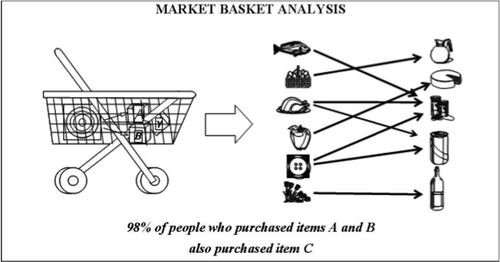

**Importing Libraries**

In [95]:
import pandas as pd 
import numpy as np 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

**Filtering the Columns**

In [96]:
cols = [77,3,1,24,7,2]
product_name=df[df.columns[cols]]

In [97]:
product_name.head()

,transaction_id,customer_id,product_id,product_name,unit_sales,time_id
0,6280371,6280,337,Better Turkey Noodle Soup,2,371
1,6280371,6280,1512,Jardon Spaghetti,3,371
2,4018371,4018,963,Just Right Chicken Noodle Soup,1,371
3,4018371,4018,181,High Top Lettuce,3,371
4,4018371,4018,1383,Sunset Plastic Spoons,2,371


**Counting each product** The number of transactions a product appeared in

In [98]:
productCountDf = product_name.groupby("product_id",as_index = False)['transaction_id'].count()

In [99]:
productCountDf.head()

,product_id,transaction_id
0,1,85
1,2,155
2,3,148
3,4,154
4,5,144


**Arranging Top Products**

In [100]:
productCountDf = productCountDf.sort_values("transaction_id",ascending = False)

In [101]:
productCountDf.head()

,product_id,transaction_id
381,382,225
501,502,219
425,426,218
1361,1362,216
864,865,214


**Top 100 most frequently purchased products**

In [102]:
topProdFrame = productCountDf.iloc[0:100,:]
productId= topProdFrame.loc[:,["product_id"]]

**Orders containting the the most frequently purchased products**

In [105]:

MarketBasketdf = product_name.iloc[0:0]  # Creates an empty DataFrame with the same structure

dfs = []  # List to store DataFrames for efficient concatenation
for i in range(0, 99):
    pId = productId.iloc[i]['product_id']
    stDf = product_name[product_name.product_id == pId]
    dfs.append(stDf)

# Concatenate all DataFrames at once (faster than repeated .append calls)
MarketBasketdf = pd.concat(dfs, ignore_index=False)

In [106]:
MarketBasketdf.head()

,transaction_id,customer_id,product_id,product_name,unit_sales,time_id
851,7438618,7438,382,Moms Roasted Chicken,2,618
2759,8477445,8477,382,Moms Roasted Chicken,3,445
2888,6559437,6559,382,Moms Roasted Chicken,3,437
3318,76462,76,382,Moms Roasted Chicken,3,462
4586,5376535,5376,382,Moms Roasted Chicken,3,535


**Putting the items into 1 transaction**

In [107]:
basket = MarketBasketdf.groupby(['transaction_id','product_name'])['unit_sales'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')

# One Hot Encoding

**Converted the units into 1 encoded value**

In [109]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1  

In [110]:
basket_sets = basket.applymap(encode_units)

In [111]:
basket_sets.head()

product_name,ADJ Rosy Sunglasses,BBB Best Apple Butter,BBB Best French Roast Coffee,BBB Best Strawberry Jelly,Best Choice Low Fat Popcorn,Better Canned Tuna in Oil,Better Chicken Noodle Soup,Better Chicken Ramen Soup,Better Fancy Canned Anchovies,Better Fancy Canned Clams,Better Noodle Soup,Big Time Chicken TV Dinner,Big Time Frozen Broccoli,Big Time Frozen Cheese Pizza,Big Time Ice Cream,Big Time Orange Popsicles,Big Time Pancake Mix,Bird Call 200 MG Acetominifen,Booker 1% Milk,Booker String Cheese,Carlson Blueberry Yogurt,Carlson Buttermilk,Carlson Head Cheese,Carlson Jack Cheese,Carlson Low Fat String Cheese,Carlson Whole Milk,Carrington Apple Cinnamon Waffles,Carrington Beef TV Dinner,Carrington Ice Cream,Carrington Ice Cream Sandwich,Consolidated Childrens Cold Remedy,Denny 60 Watt Lightbulb,Dollar Monthly Home Magazine,Ebony Fresh Lima Beans,Ebony Mixed Nuts,Ebony Red Delcious Apples,Ebony Squash,Fabulous Apple Juice,Fabulous Cranberry Juice,Fabulous Orange Juice,Fantastic Rye Bread,Fast Beef Jerky,Fort West BBQ Potato Chips,Framton City Map,Great English Muffins,Great Pumpernickel Bread,Hermanos Elephant Garlic,Hermanos Golden Delcious Apples,Hermanos Green Pepper,Hermanos Mandarin Oranges,Hermanos Potatos,Hermanos Squash,Hermanos Tomatos,Hilltop 200 MG Ibuprofen,Hilltop Deodorant,Hilltop Extra Moisture Shampoo,Hilltop Mint Mouthwash,Hilltop Silky Smooth Hair Conditioner,Just Right Chicken Ramen Soup,Just Right Turkey Noodle Soup,Landslide Strawberry Jam,Mighty Good Monthly Sports Magazine,Moms Beef Bologna,Moms Potato Salad,Moms Roasted Chicken,Moms Sliced Turkey,Monarch Manicotti,Monarch Rice Medly,Nationeel Avocado Dip,Nationeel Dried Apples,Nationeel Golden Raisins,Nationeel Graham Crackers,Nationeel Grape Fruit Roll,Red Wing 25 Watt Lightbulb,Red Wing 60 Watt Lightbulb,Red Wing Counter Cleaner,Red Wing Glass Cleaner,Red Wing Plastic Knives,Red Wing Tissues,Skinner Strawberry Drink,Special Wheat Puffs,Steady 200 MG Acetominifen,Steady 200 MG Ibuprofen,Steady Childrens Cold Remedy,Steady Whitening Toothpast,Sunset 75 Watt Lightbulb,Sunset Counter Cleaner,Sunset Economy Toilet Brush,Sunset Large Sponge,Sunset Paper Cups,Sunset Paper Plates,Sunset Soft Napkins,Super Grape Jam,Super Strawberry Jelly,Tell Tale Fresh Lima Beans,Tell Tale Lettuce,Tell Tale Sweet Onion,Thresher Malted Milk Balls,Thresher White Chocolate Bar
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10000872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10000903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100011011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10001793,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Size and shape of basket**

In [112]:
basket_sets.size

1675971

In [113]:
basket_sets.shape

(16929, 99)

In [114]:
dummy=basket_sets.head(10000)

# Apriori Algorithm

**Importing Apriori and Association rules Libraries**

In [115]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Frequent items with support 0.01% using Apriori Algorithm**

In [116]:
frequent_itemsets = apriori(dummy, min_support=0.0001, use_colnames=True)

**Association rules using Apriori Algorithm**

In [117]:
apriori_rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1)

**Filtering out co-realted products with higher Probability**

In [119]:
filtered = apriori_rules[ (apriori_rules['lift'] >= 50) & (apriori_rules['confidence'] >= 0.01) ]

# Recommendations using Apriori Algorithm

In [120]:
def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,2646):
        if item == apriori_rules.iloc[i,0]:
            recommend.append(apriori_rules.iloc[i,1])
    
    return recommend

**5 Recommendations with Better Chicken Noodle Soup**

In [121]:
product_name = {'Better Chicken Noodle Soup'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Better Chicken Ramen Soup'})
frozenset({'Carlson Blueberry Yogurt'})
frozenset({'Framton City Map'})
frozenset({'Hermanos Green Pepper'})
frozenset({'Hilltop Extra Moisture Shampoo'})


**10 Recommendations with Moms Potato Salad**

In [122]:
product_name = {'Moms Potato Salad'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'Better Chicken Noodle Soup'})
frozenset({'Big Time Frozen Cheese Pizza'})
frozenset({'Framton City Map'})
frozenset({'Great Pumpernickel Bread'})
frozenset({'Hermanos Green Pepper'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Hilltop Silky Smooth Hair Conditioner'})
frozenset({'Moms Roasted Chicken'})
frozenset({'Nationeel Grape Fruit Roll'})
frozenset({'Red Wing 60 Watt Lightbulb'})


**15 Recommendations with Carrington Ice Cream Sandwich**

In [123]:
product_name = {'Carrington Ice Cream Sandwich'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'Better Fancy Canned Anchovies'})
frozenset({'Fabulous Cranberry Juice'})
frozenset({'Great English Muffins'})
frozenset({'Hermanos Mandarin Oranges'})
frozenset({'Hermanos Squash'})
frozenset({'Hermanos Tomatos'})
frozenset({'Just Right Turkey Noodle Soup'})
frozenset({'Sunset Economy Toilet Brush'})
frozenset({'Better Canned Tuna in Oil', 'Just Right Turkey Noodle Soup'})
frozenset({'Fabulous Apple Juice', 'Better Fancy Canned Anchovies'})
frozenset({'Fabulous Cranberry Juice', 'Better Fancy Canned Anchovies'})
frozenset({'Framton City Map', 'Booker 1% Milk'})
frozenset({'Carlson Jack Cheese', 'Steady Childrens Cold Remedy'})
frozenset({'Carrington Beef TV Dinner', 'Denny 60 Watt Lightbulb'})


# Fpgrowth Algorithm

**Importing Fpgrowth Libraries**

In [124]:
from mlxtend.frequent_patterns import fpgrowth

**Frequent Items with support 0.001% using Fpgrowth Algorithm**

In [125]:
freq_items=fpgrowth(dummy,min_support=.0001,use_colnames=True)

**Association Rules using Fpgrowth Algorithm**

In [126]:
fpgrowth_rules=association_rules(freq_items,metric="lift",min_threshold=1)

# Recommendations using Fpgrowth Algorithm

In [127]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,2646):
        if item == fpgrowth_rules.iloc[i,0]:
            recommend.append(fpgrowth_rules.iloc[i,1])
    
    return recommend

**5 Recommendations with Better Chicken Noodle Soup**

In [128]:
product_name = {'Better Chicken Noodle Soup'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Moms Potato Salad'})
frozenset({'Special Wheat Puffs', 'Moms Potato Salad'})
frozenset({'Sunset Large Sponge'})
frozenset({'Sunset Large Sponge', 'Better Chicken Ramen Soup'})
frozenset({'Special Wheat Puffs'})


**10 Recommendations with Moms Potato Salad**

In [129]:
product_name = {'Moms Potato Salad'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'Better Chicken Noodle Soup'})
frozenset({'Framton City Map'})
frozenset({'Great Pumpernickel Bread'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Red Wing 60 Watt Lightbulb'})
frozenset({'Steady 200 MG Acetominifen'})
frozenset({'Big Time Frozen Cheese Pizza'})
frozenset({'Hilltop Silky Smooth Hair Conditioner'})
frozenset({'Hermanos Green Pepper'})
frozenset({'Special Wheat Puffs', 'Better Chicken Noodle Soup'})


**15 Recommendations with Carrington Ice Cream Sandwich**

In [130]:
product_name = {'Carrington Ice Cream Sandwich'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'Fabulous Cranberry Juice'})
frozenset({'Fabulous Cranberry Juice', 'Better Fancy Canned Anchovies'})
frozenset({'Hermanos Mandarin Oranges'})
frozenset({'Hermanos Tomatos'})
frozenset({'Hermanos Squash'})
frozenset({'Sunset Economy Toilet Brush'})
frozenset({'Better Fancy Canned Anchovies'})
frozenset({'Just Right Turkey Noodle Soup'})
frozenset({'Great English Muffins'})
frozenset({'Carrington Beef TV Dinner', 'Denny 60 Watt Lightbulb'})
frozenset({'Carlson Jack Cheese', 'Steady Childrens Cold Remedy'})
frozenset({'Framton City Map', 'Booker 1% Milk'})
frozenset({'Better Canned Tuna in Oil', 'Just Right Turkey Noodle Soup'})
frozenset({'Fabulous Apple Juice', 'Better Fancy Canned Anchovies'})


# Apriori VS fpgrowth Algorithm

**Calculating Run Time of Apriori Algorithm**

In [131]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

,support,itemsets
0,0.0112,(ADJ Rosy Sunglasses)
1,0.0117,(BBB Best Apple Butter)
2,0.0116,(BBB Best French Roast Coffee)
3,0.0118,(BBB Best Strawberry Jelly)
4,0.0119,(Best Choice Low Fat Popcorn)
5,0.0113,(Better Canned Tuna in Oil)
6,0.0120,(Better Chicken Noodle Soup)
7,0.0120,(Better Chicken Ramen Soup)
8,0.0122,(Better Fancy Canned Anchovies)
9,0.0114,(Better Fancy Canned Clams)


,support,itemsets


,support,itemsets


,support,itemsets


,support,itemsets


**Calculating Run Time of Fpgrowth Algorithm**

In [132]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

,support,itemsets
0,0.0120,(Moms Potato Salad)
1,0.0136,(Great English Muffins)
2,0.0131,(Carlson Low Fat String Cheese)
3,0.0119,(Sunset Large Sponge)
4,0.0113,(Fabulous Apple Juice)
5,0.0116,(BBB Best French Roast Coffee)
6,0.0124,(Special Wheat Puffs)
7,0.0120,(Better Chicken Noodle Soup)
8,0.0112,(ADJ Rosy Sunglasses)
9,0.0121,(Big Time Orange Popsicles)


,support,itemsets


,support,itemsets


,support,itemsets


,support,itemsets


**Graph of Run Time between Apriori and Fpgrowth Algorithm**

<Axes: >

<Axes: >

Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

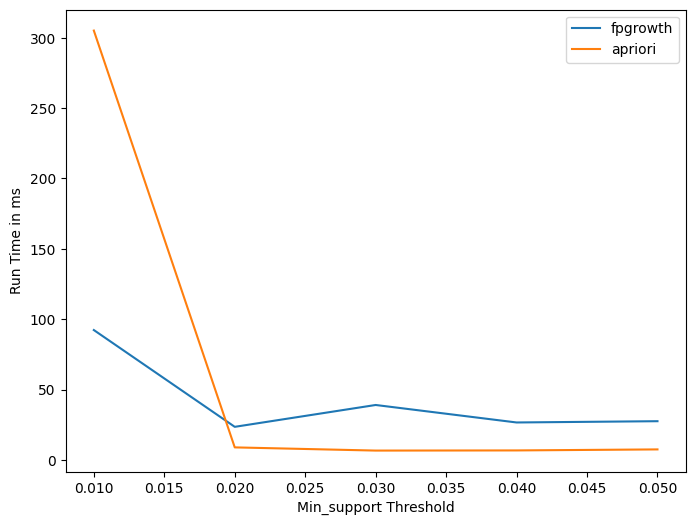

In [133]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

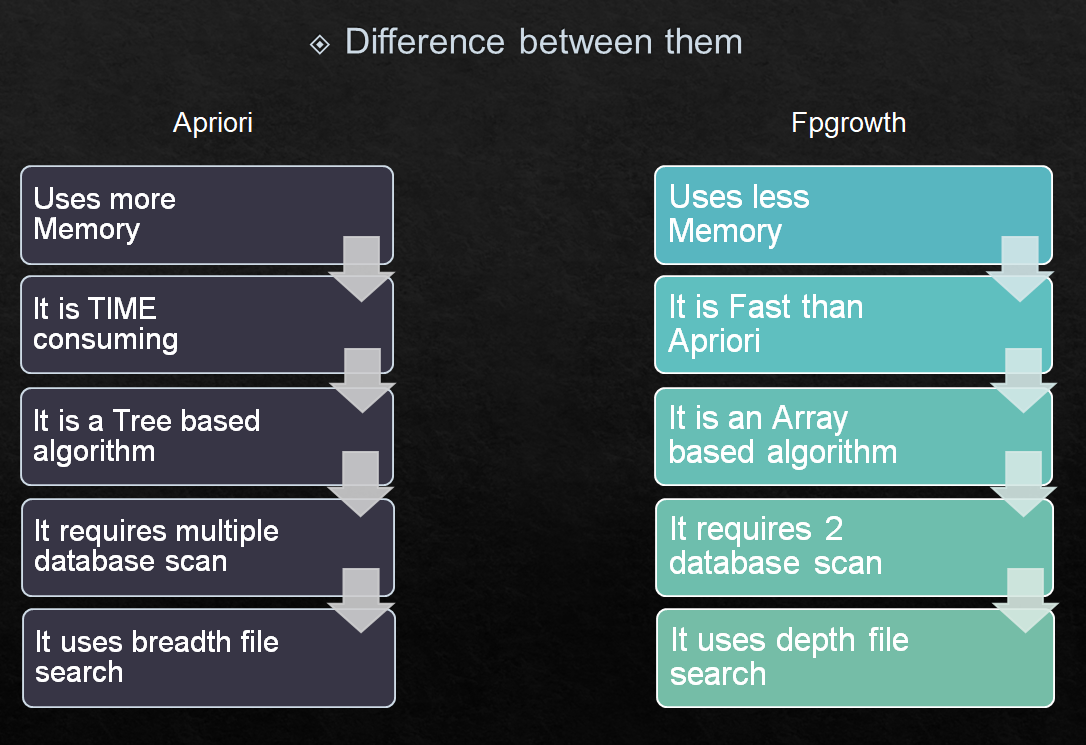